# Exploratory Data Analysis: Part 2
## National Power Database

For this tutorial, we will be using the following libraries:

- `pandas` for loading the data from a csv file.
- `matplotlib` and `seaborn` for visualizing the data.
- `plotly` for interactive visualization. 
- `numpy` for performing mathematical operations.

Use `shift+enter` to run the cells.

#### Import required python libraries

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
plt.rcParams["figure.dpi"] = 300 

# 1. Understanding the data

## 1.1 Loading the data
Load `data_cleaned.csv` file into a variable named `df` using `read_csv` in pandas

In [68]:
# from google.colab import drive

In [69]:
# drive.mount('/content/gdrive')

In [70]:
# loading data
# raw_data = pd.read_csv('/content/gdrive/MyDrive/ds_workshop/data_cleaned.csv')
raw_data = pd.read_csv('data_cleaned.csv')

In [71]:
raw_data

date  monitored_capacity_mw  total_capacity_under_maintenance_mw  \
0     2018-01-01              270648.43                             73883.61   
1     2018-01-02              271498.43                             73794.38   
2     2018-01-03              271245.51                             77858.33   
3     2018-01-04              274925.51                             69200.40   
4     2018-01-05              274711.51                             71556.05   
...          ...                    ...                                  ...   
1378  2021-12-27              288468.93                             75614.54   
1379  2021-12-28              288468.93                             77576.54   
1380  2021-12-29              288468.93                             81282.51   
1381  2021-12-30              288468.93                             83190.28   
1382  2021-12-31              288468.93                             80304.31   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
0                    9594.65                    3180                  3088   
1                   10406.57                    3223                  3206   
2                    9552.87                    3353                  3353   
3                    8832.90                    3371                  3163   
4                    9514.40                    3388                  3191   
...                      ...                     ...                   ...   
1378                13943.55                    3502                  3522   
1379                14323.55                    3502                  3443   
1380                14258.51                    3502                  3352   
1381                14008.51                    3509                  3306   
1382                13581.05                    3541                  3418   

      unplanned_maintenance_mw  deviation_generation_mu  
0                     54042.50                      -92  
1                     53170.10                      -17  
2                     57569.60                        0  
3                     49143.10                     -208  
4                     49921.10                     -197  
...                        ...                      ...  
1378                  41297.79                       20  
1379                  42755.59                      -59  
1380                  45581.59                     -150  
1381                  46772.59                     -203  
1382                  43877.59                     -123  

[1383 rows x 8 columns]

## 1.2 Preliminary analysis

In [72]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   date                                 1383 non-null   object 
 1   monitored_capacity_mw                1383 non-null   float64
 2   total_capacity_under_maintenance_mw  1383 non-null   float64
 3   planned_maintenance_mw               1383 non-null   float64
 4   expected_generation_mu               1383 non-null   int64  
 5   actual_generation_mu                 1383 non-null   int64  
 6   unplanned_maintenance_mw             1383 non-null   float64
 7   deviation_generation_mu              1383 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 86.6+ KB


In [73]:
raw_data.describe()

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
count            1383.000000                          1383.000000   
mean           280555.044895                         86452.195249   
std              5289.536557                         10375.103721   
min            270648.430000                         64837.560000   
25%            274831.510000                         78232.675000   
50%            281514.150000                         85431.220000   
75%            284003.430000                         94001.190000   
max            288468.930000                        118925.530000   

       planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
count             1383.000000             1383.000000           1383.000000   
mean             11795.995322             3496.699205           3376.720897   
std               3448.578858              167.988691            244.577897   
min               5005.200000             3166.000000           2601.000000   
25%               9109.100000             3378.500000           3209.500000   
50%              10953.700000             3463.000000           3342.000000   
75%              14244.400000             3628.000000           3536.500000   
max              22674.370000             3920.000000           4242.000000   

       unplanned_maintenance_mw  deviation_generation_mu  
count               1383.000000              1383.000000  
mean               57614.089125              -119.978308  
std                 9176.398351               243.081822  
min                39988.660000             -1091.000000  
25%                51435.245000              -257.000000  
50%                55462.730000              -111.000000  
75%                62212.880000                31.000000  
max                89436.980000               637.000000

#### How many days are there?

In [74]:
raw_data['date'].describe()

count           1383
unique          1383
top       2018-01-01
freq               1
Name: date, dtype: object

In [75]:
raw_data.head()

date  monitored_capacity_mw  total_capacity_under_maintenance_mw  \
0  2018-01-01              270648.43                             73883.61   
1  2018-01-02              271498.43                             73794.38   
2  2018-01-03              271245.51                             77858.33   
3  2018-01-04              274925.51                             69200.40   
4  2018-01-05              274711.51                             71556.05   

   planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
0                 9594.65                    3180                  3088   
1                10406.57                    3223                  3206   
2                 9552.87                    3353                  3353   
3                 8832.90                    3371                  3163   
4                 9514.40                    3388                  3191   

   unplanned_maintenance_mw  deviation_generation_mu  
0                   54042.5                      -92  
1                   53170.1                      -17  
2                   57569.6                        0  
3                   49143.1                     -208  
4                   49921.1                     -197

## 1.3 Preliminary plotting 

In [76]:
x=['Monitored Capacity', 'Total Maintenance']
y=[raw_data['monitored_capacity_mw'].sum(), raw_data['total_capacity_under_maintenance_mw'].sum()]

<BarContainer object of 2 artists>

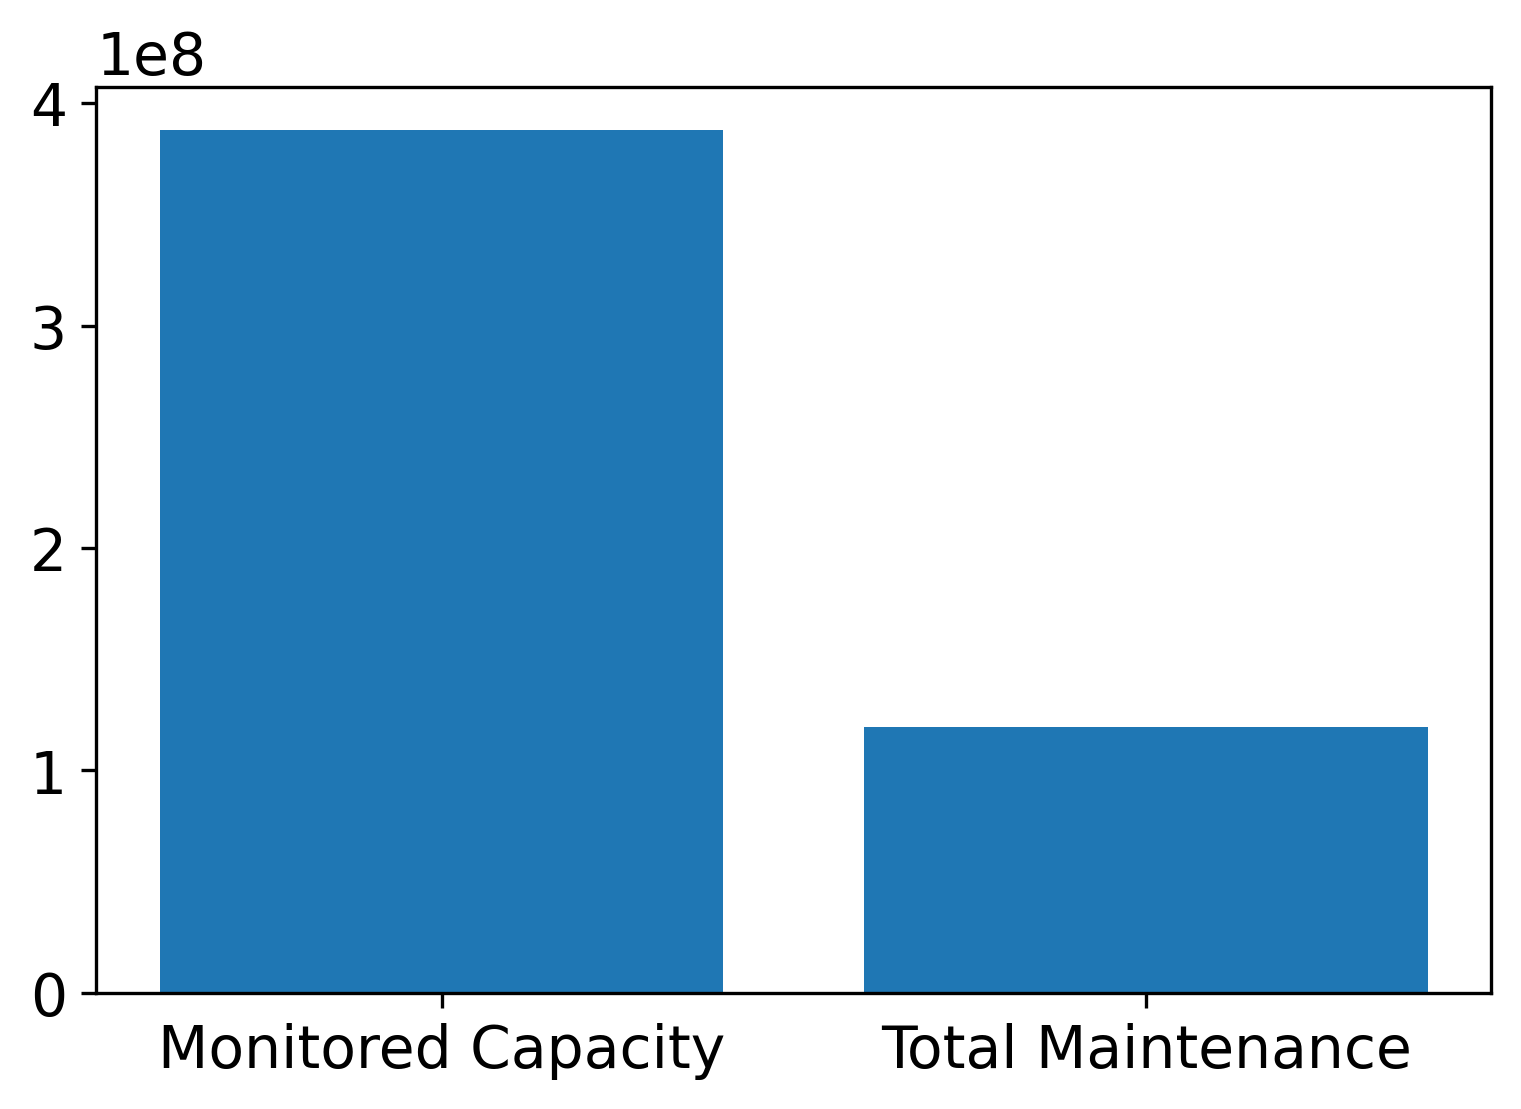

In [77]:
plt.bar(x,y)

In [78]:
monitored = raw_data['monitored_capacity_mw'].sum()
tot_maintenance = raw_data['total_capacity_under_maintenance_mw'].sum()

tot_maintenance/(monitored+tot_maintenance)*100

23.555991760651

Effectively 23% of the plants are under maintanence, only 77% of the plants are running.

Let's look at how we are doing through the years.

## 1.4 Converting to datetime format and analysis

In [79]:
raw_df = raw_data.copy()

In [80]:
raw_df['date'] = pd.to_datetime(raw_df['date'])

In [81]:
# sort by date
raw_df = raw_df.sort_values(by=['date'])

In [82]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   date                                 1383 non-null   datetime64[ns]
 1   monitored_capacity_mw                1383 non-null   float64       
 2   total_capacity_under_maintenance_mw  1383 non-null   float64       
 3   planned_maintenance_mw               1383 non-null   float64       
 4   expected_generation_mu               1383 non-null   int64         
 5   actual_generation_mu                 1383 non-null   int64         
 6   unplanned_maintenance_mw             1383 non-null   float64       
 7   deviation_generation_mu              1383 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 86.6 KB


In [83]:
raw_df

date  monitored_capacity_mw  total_capacity_under_maintenance_mw  \
0    2018-01-01              270648.43                             73883.61   
1    2018-01-02              271498.43                             73794.38   
2    2018-01-03              271245.51                             77858.33   
3    2018-01-04              274925.51                             69200.40   
4    2018-01-05              274711.51                             71556.05   
...         ...                    ...                                  ...   
1378 2021-12-27              288468.93                             75614.54   
1379 2021-12-28              288468.93                             77576.54   
1380 2021-12-29              288468.93                             81282.51   
1381 2021-12-30              288468.93                             83190.28   
1382 2021-12-31              288468.93                             80304.31   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
0                    9594.65                    3180                  3088   
1                   10406.57                    3223                  3206   
2                    9552.87                    3353                  3353   
3                    8832.90                    3371                  3163   
4                    9514.40                    3388                  3191   
...                      ...                     ...                   ...   
1378                13943.55                    3502                  3522   
1379                14323.55                    3502                  3443   
1380                14258.51                    3502                  3352   
1381                14008.51                    3509                  3306   
1382                13581.05                    3541                  3418   

      unplanned_maintenance_mw  deviation_generation_mu  
0                     54042.50                      -92  
1                     53170.10                      -17  
2                     57569.60                        0  
3                     49143.10                     -208  
4                     49921.10                     -197  
...                        ...                      ...  
1378                  41297.79                       20  
1379                  42755.59                      -59  
1380                  45581.59                     -150  
1381                  46772.59                     -203  
1382                  43877.59                     -123  

[1383 rows x 8 columns]

#### Let's analyse the data yearwise.

In [84]:
raw_df_yr = raw_df.groupby(raw_df.date.dt.year)[list(raw_df.select_dtypes(include=[np.number]))].sum()

In [85]:
raw_df_yr

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                               
2018           9.910275e+07                          28387648.33   
2019           1.016979e+08                          31386724.16   
2020           8.246879e+07                          27827765.76   
2021           1.047382e+08                          31961247.78   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
date                                                                         
2018              4034216.70                 1211265               1208585   
2019              4288690.98                 1291731               1218228   
2020              2902384.38                 1013669                961515   
2021              5088569.47                 1319270               1281677   

      unplanned_maintenance_mw  deviation_generation_mu  
date                                                     
2018               19892189.34                    -2680  
2019               20610017.29                   -73503  
2020               19433510.64                   -52154  
2021               19744567.99                   -37593

In [86]:
font = {'family':'Arial', 'size':14}
plt.rc('font', **font)

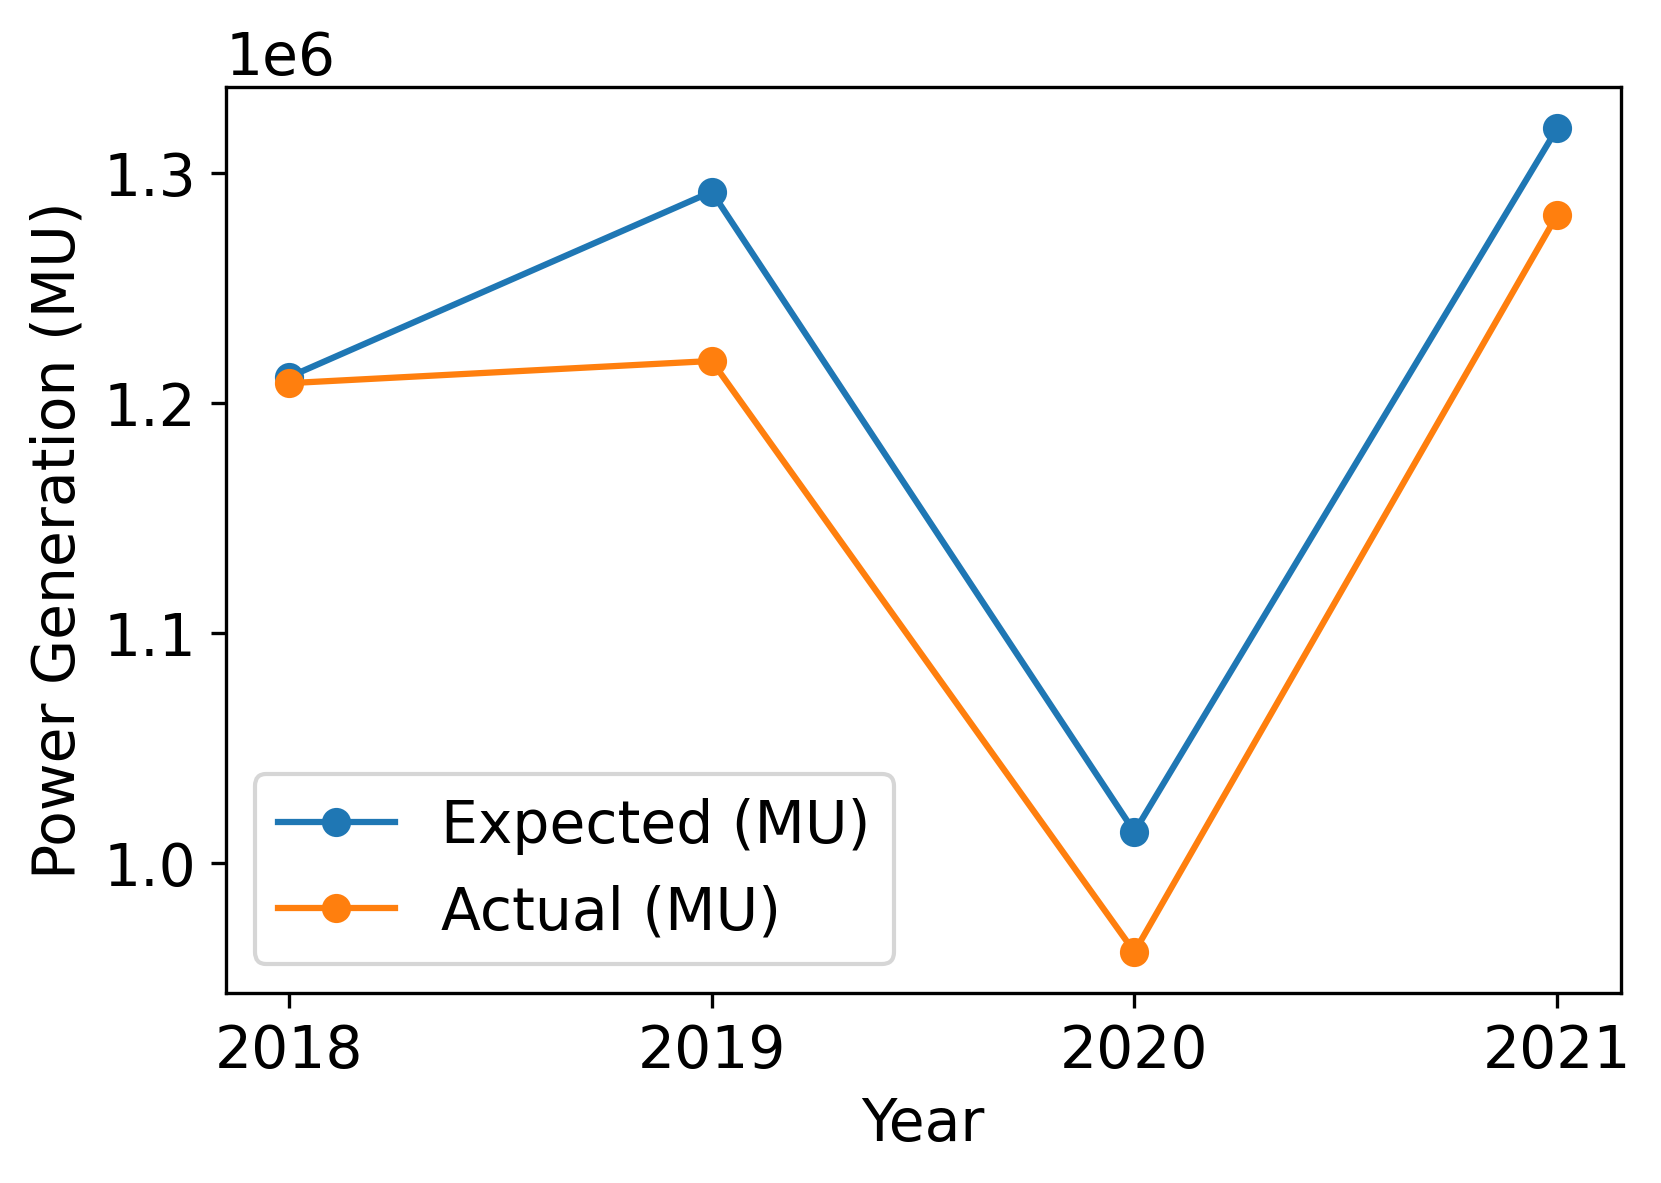

In [87]:
plt.plot(raw_df_yr['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(raw_df_yr['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Power Generation (MU)')
plt.xticks(np.arange(2018, 2022, 1));

<BarContainer object of 2 artists>

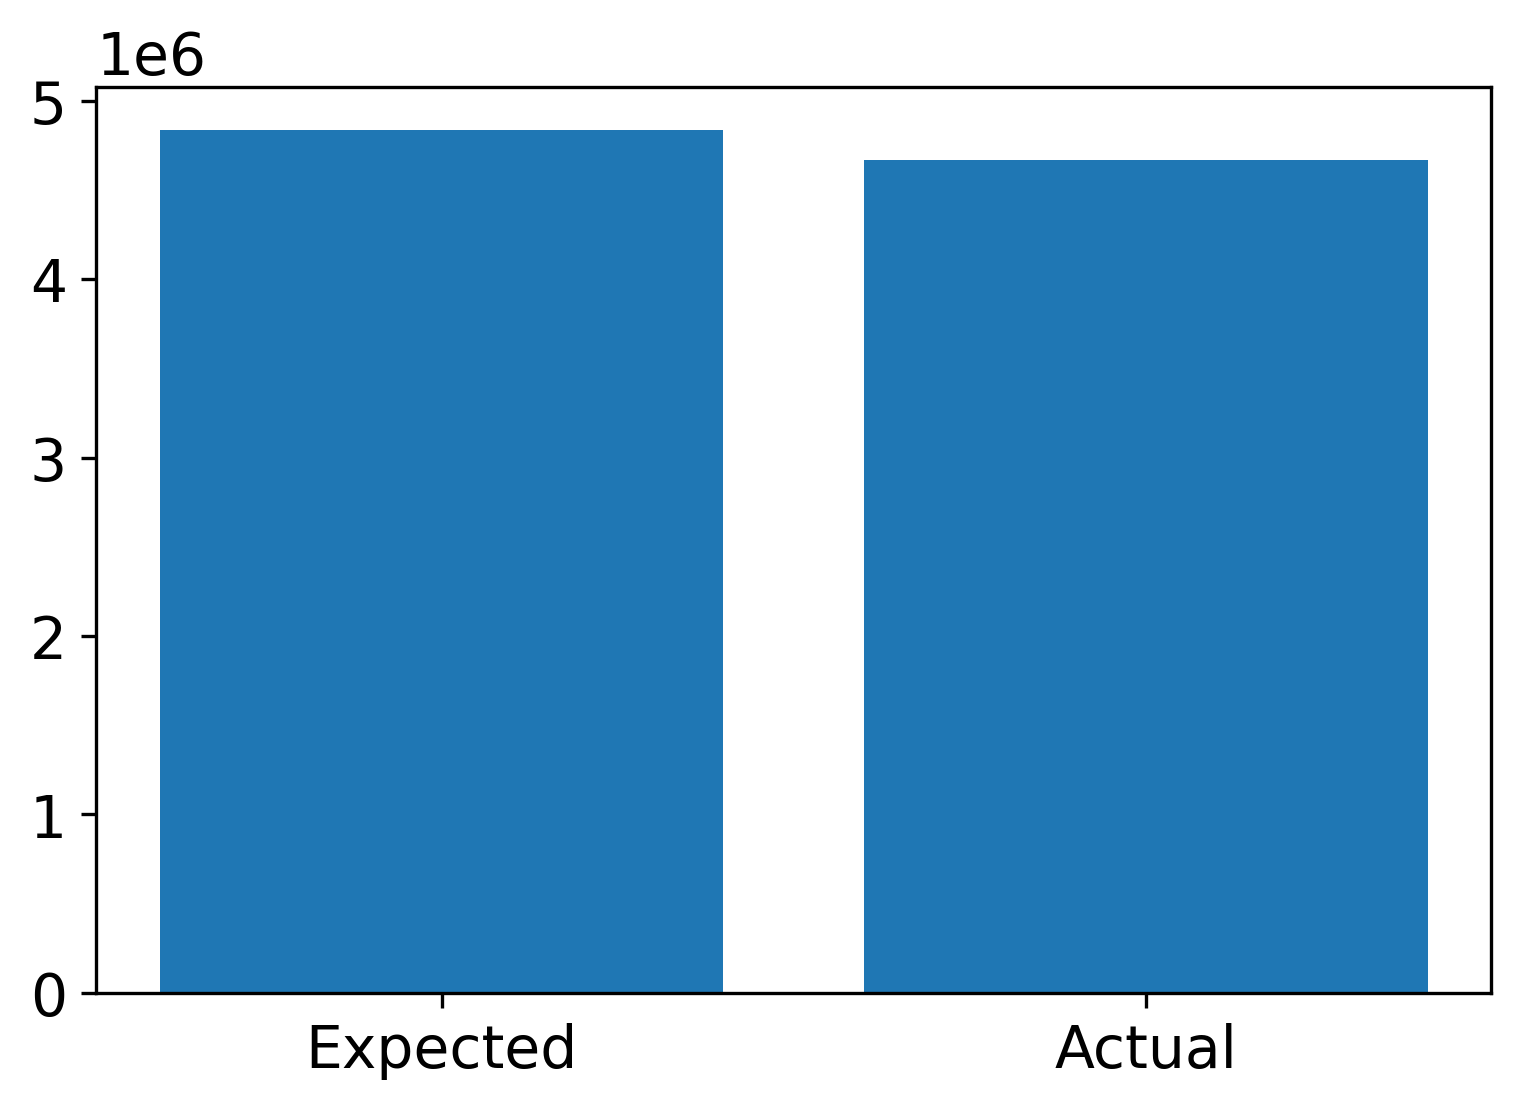

In [88]:
x=['Expected', 'Actual']
y=[raw_df_yr['expected_generation_mu'].sum(), raw_df_yr['actual_generation_mu'].sum()]
plt.bar(x,y)

# 2. Data exploration

## 2.1 Capacity and power generation

In [89]:
x=['Monitored', 'Total Maintenance']
y=[raw_df['monitored_capacity_mw'].sum(), raw_df['total_capacity_under_maintenance_mw'].sum()]

<BarContainer object of 2 artists>

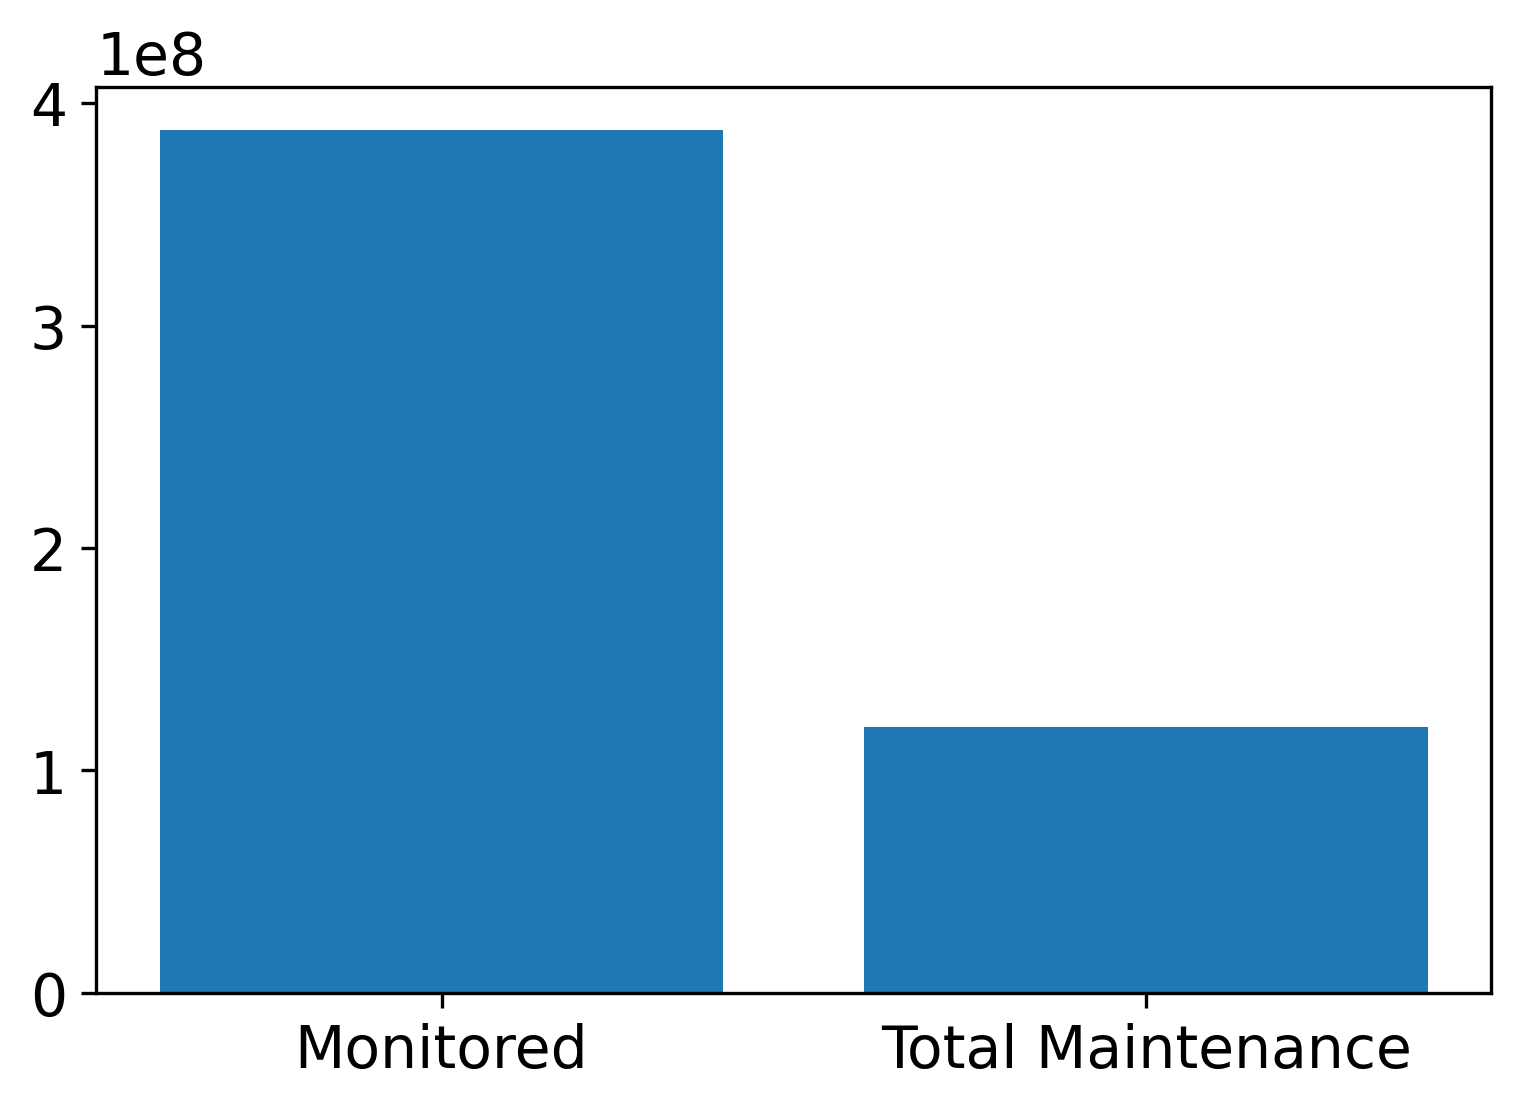

In [90]:
plt.bar(x,y)

Let's calculate the percent of both and put it in a pie chart

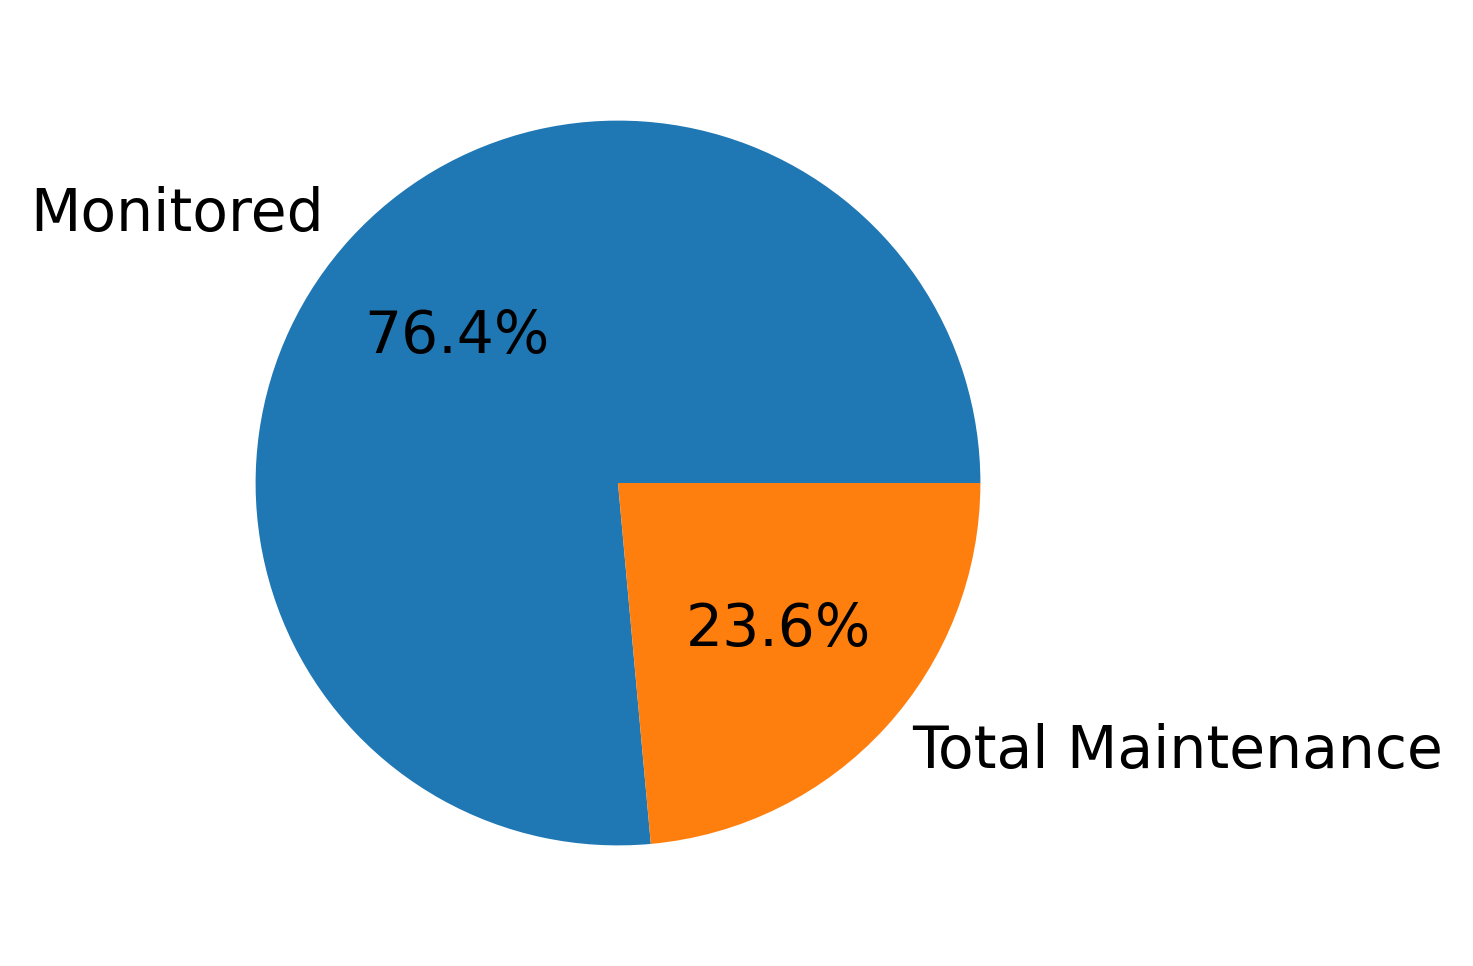

In [91]:
plt.pie(y, labels=x, autopct='%1.1f%%');

Effectively 24% of the plants are under maintanence, only 76% of the plants are running.

##### Let's explore the types of maintenance

In [92]:
x = ['total', 'planned', 'unplanned']
y = [raw_df['total_capacity_under_maintenance_mw'].sum(), raw_df['planned_maintenance_mw'].sum(),
    raw_df['unplanned_maintenance_mw'].sum()]

Text(0, 0.5, 'Power (MW)')

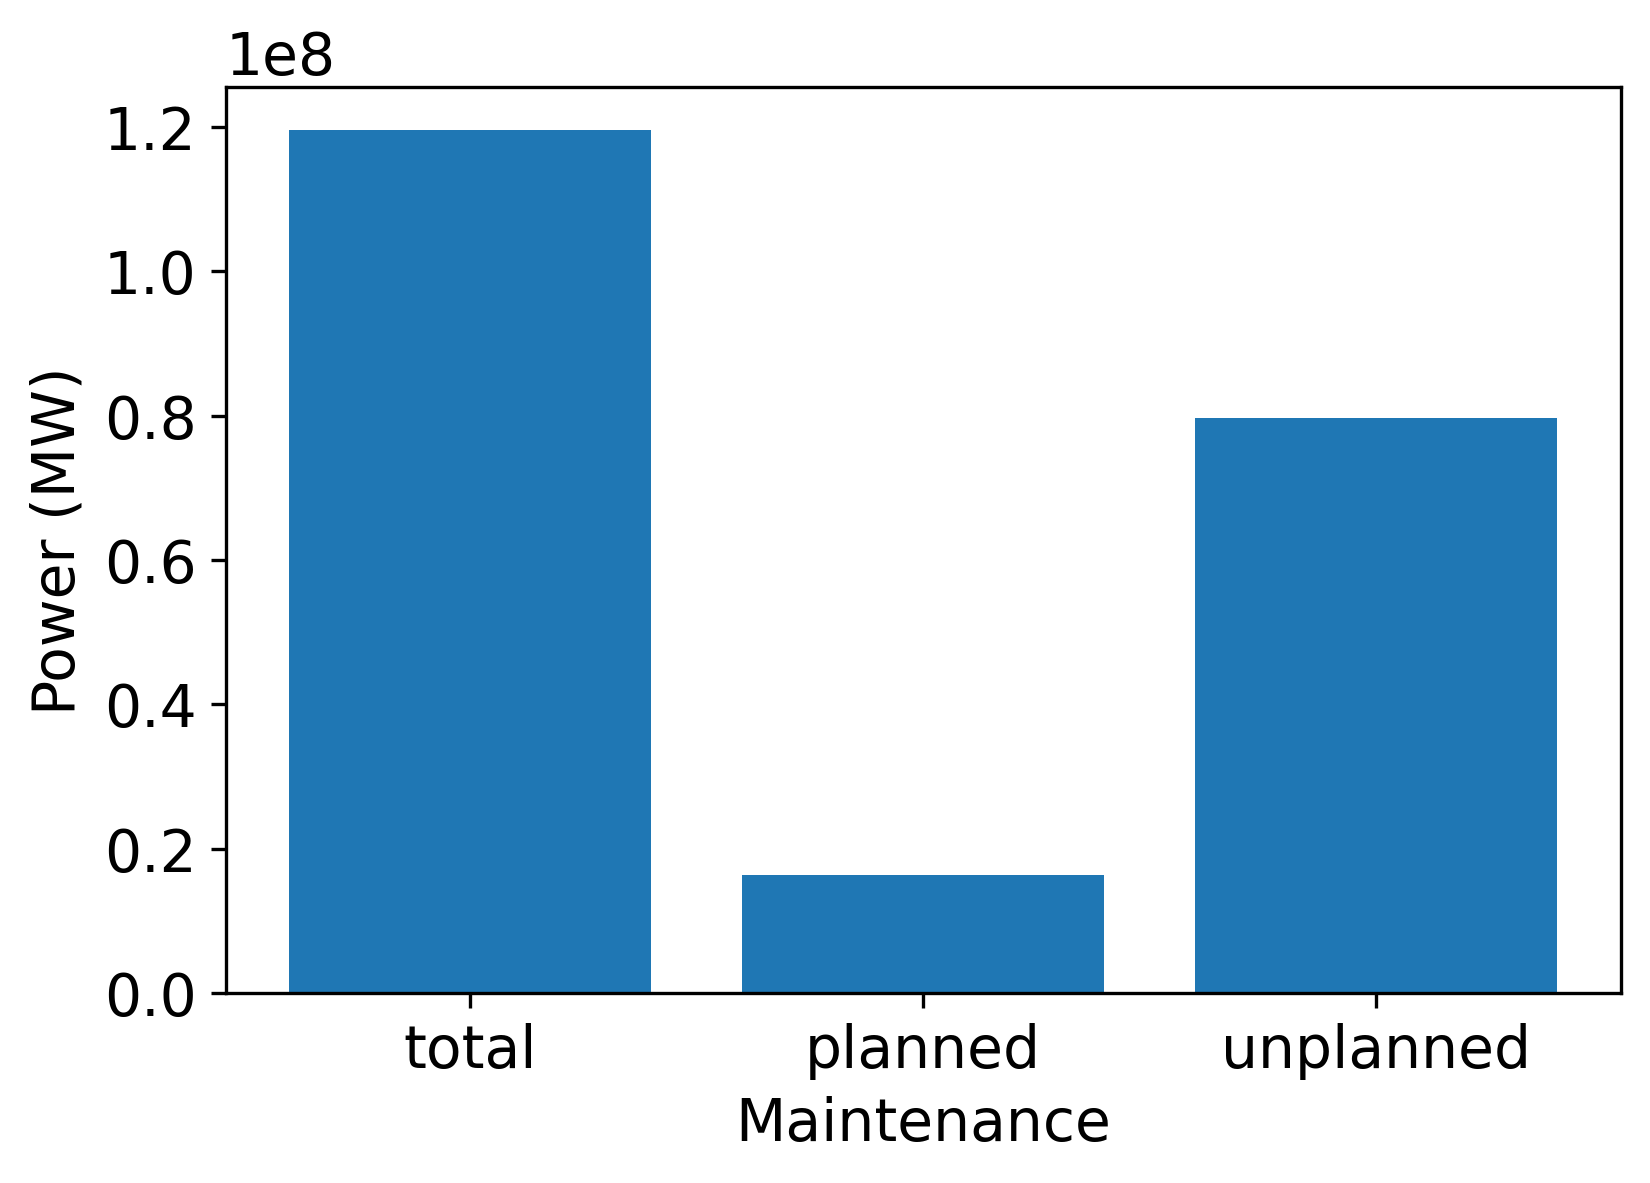

In [93]:
plt.bar(x,y)
plt.xlabel('Maintenance')
plt.ylabel('Power (MW)')

##### What percent of the maintenanace is unplanned?

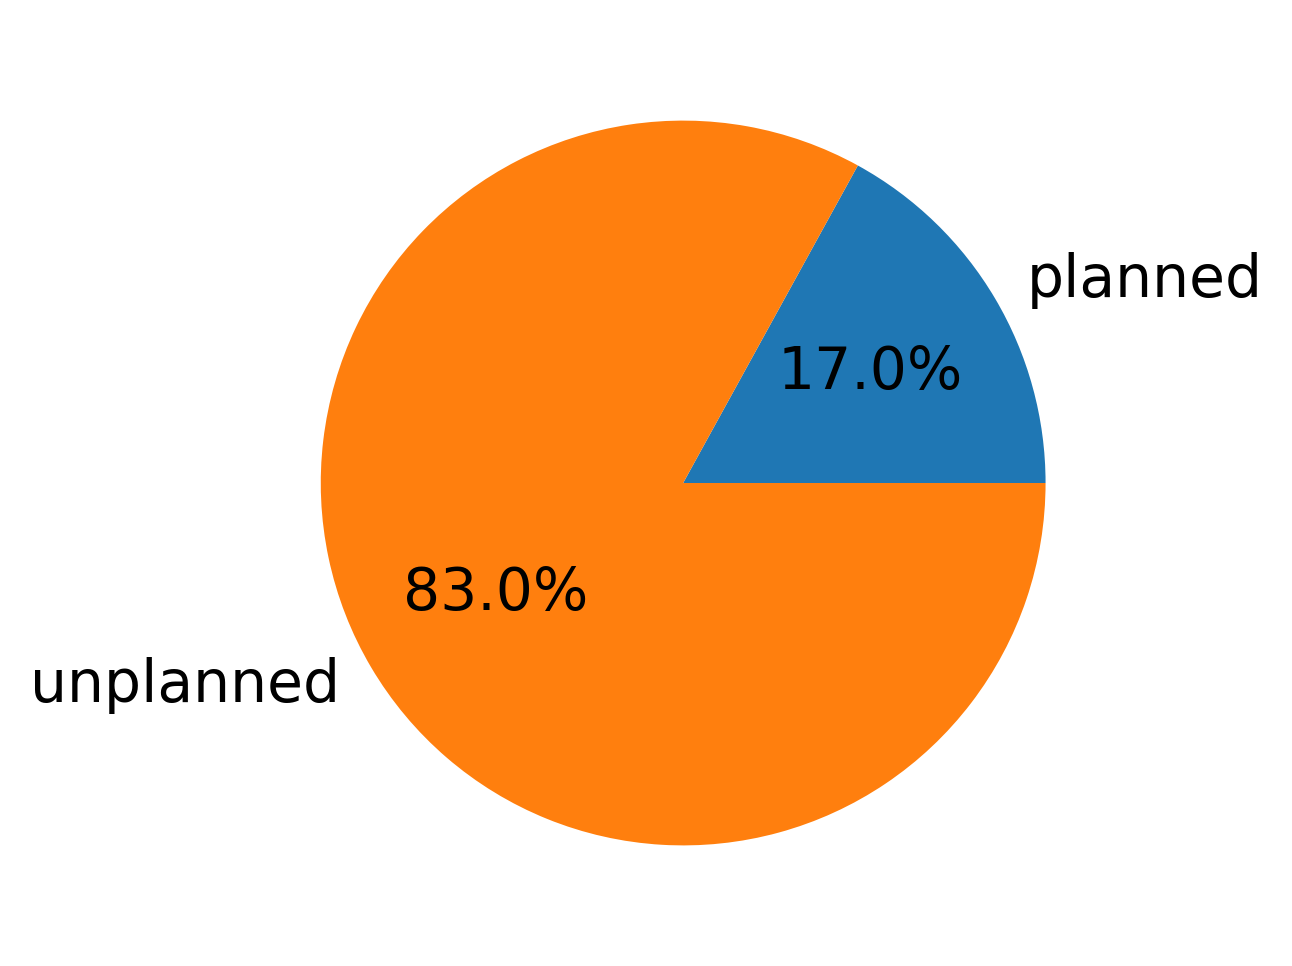

In [94]:
x = ['planned', 'unplanned']
y = [raw_df['planned_maintenance_mw'].sum(), raw_df['unplanned_maintenance_mw'].sum()]

plt.pie(y, labels=x, autopct='%1.1f%%');

- ~83% of the operations are unplanned and only 17% are planned.
- There is a plenty of room here to improve. How can we cut down the unplanned maintenance?

#### Expected and Actual power generation

In [95]:
x = ['Expected', 'Actual']
y = [raw_df['expected_generation_mu'].sum(), raw_df['actual_generation_mu'].sum()]

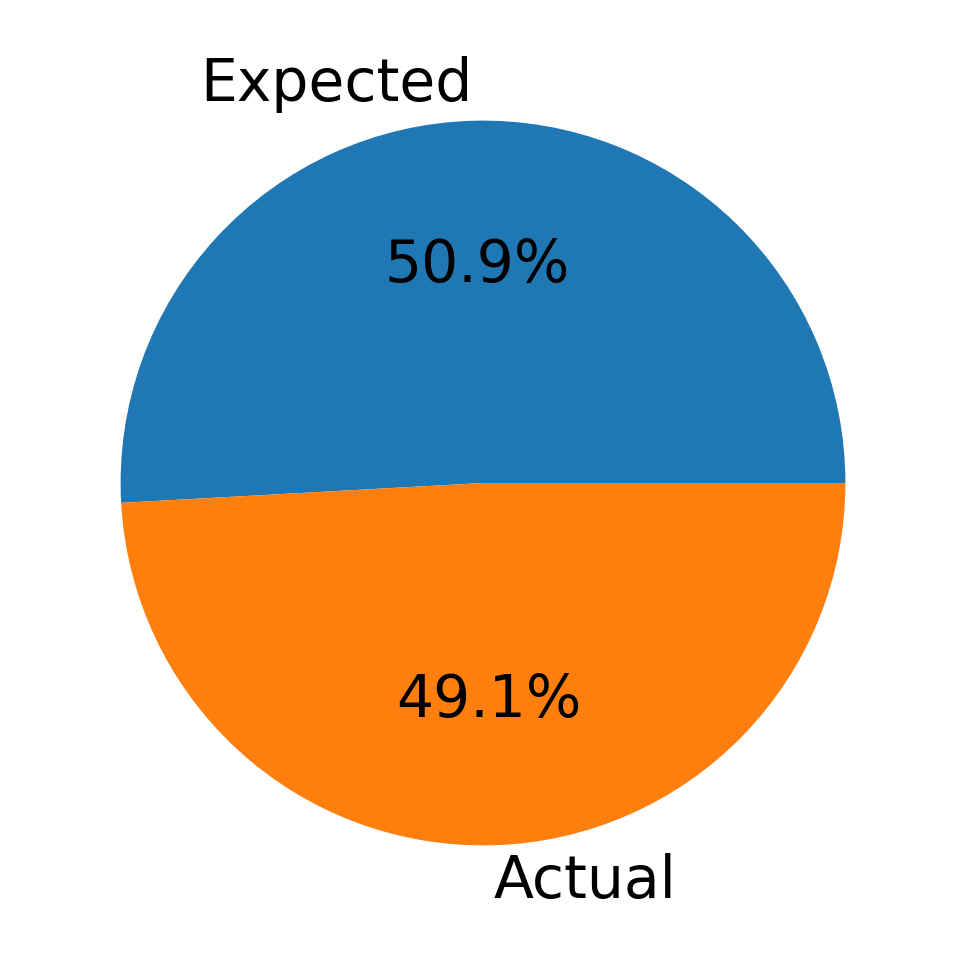

In [96]:
plt.pie(y, labels=x, autopct='%1.1f%%');

When we sum up, actual power generation falls short of only 1%. Some days will have more power and some days less.

Text(0, 0.5, 'Counts')

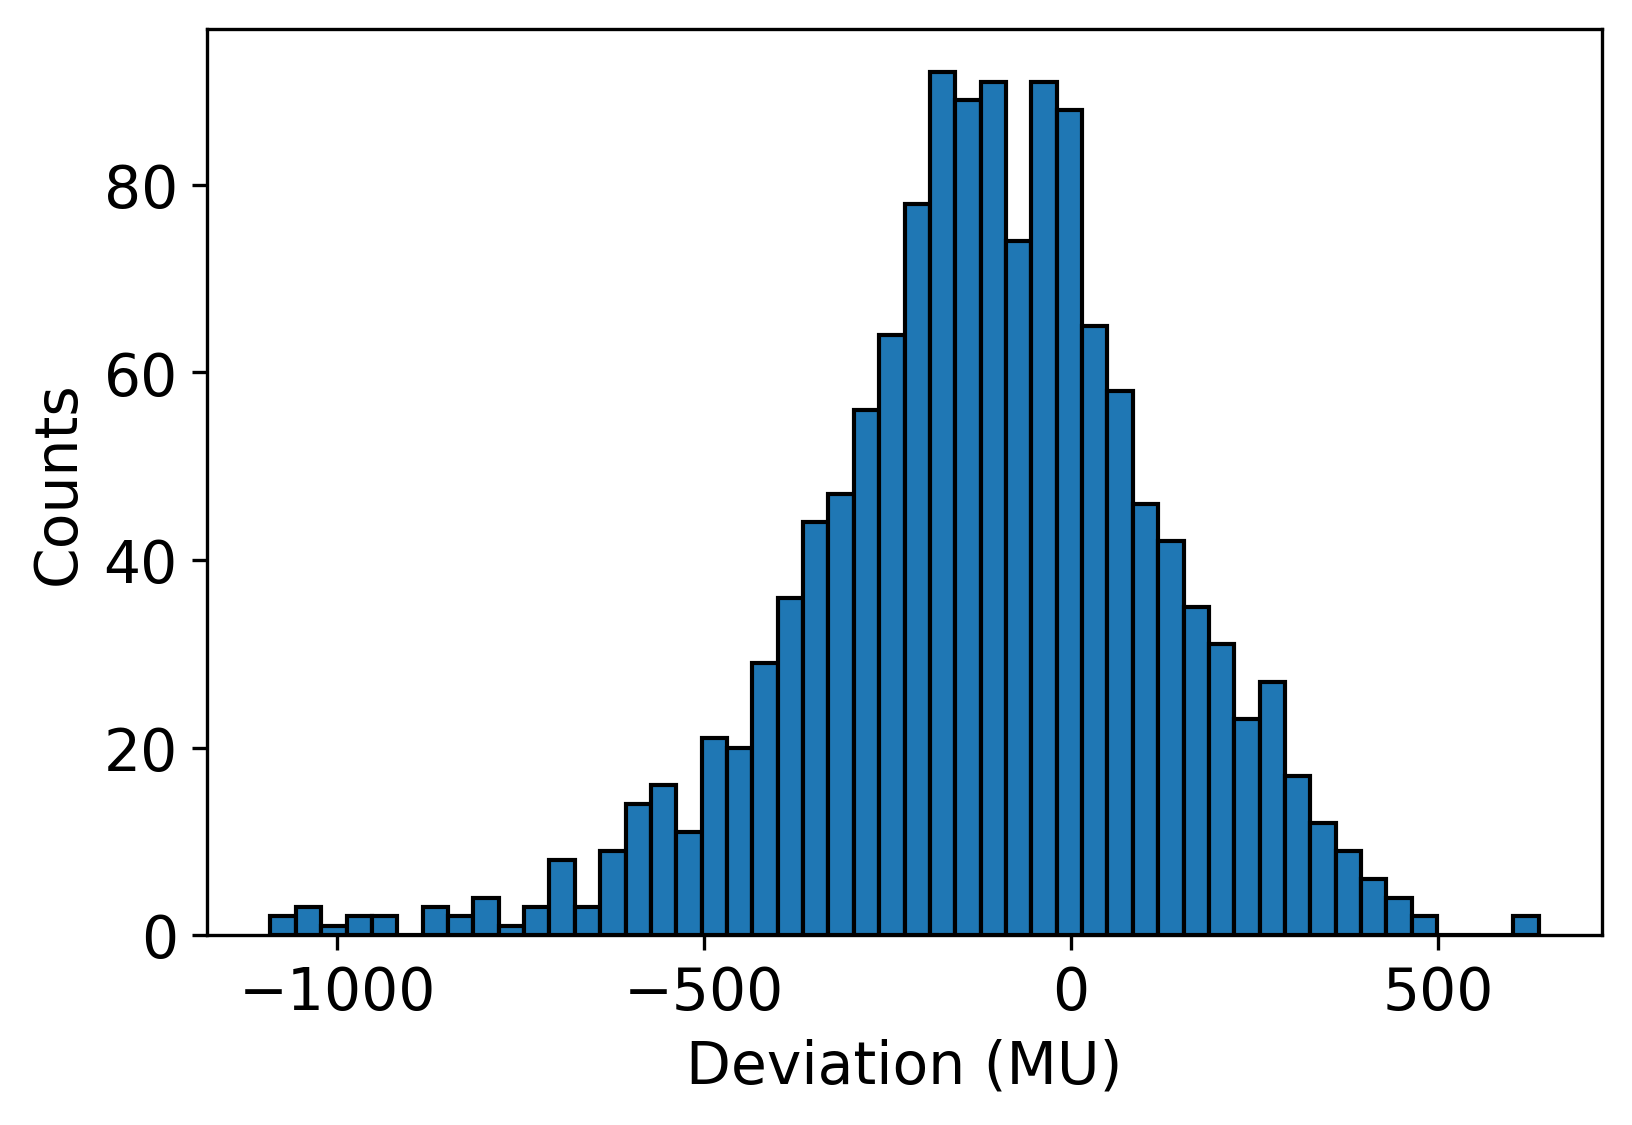

In [97]:
plt.hist(raw_df['deviation_generation_mu'], bins = 50, edgecolor = 'k');
plt.xlabel('Deviation (MU)'); plt.ylabel('Counts')

## 2.2 Year, month, and daywise analysis

Let's explore over the years, how we are doing.

In [98]:
raw_df_yr = raw_df.groupby(raw_df.date.dt.year)[list(raw_df.select_dtypes(include=[np.number]))].sum()

In [99]:
raw_df_yr

monitored_capacity_mw  total_capacity_under_maintenance_mw  \
date                                                               
2018           9.910275e+07                          28387648.33   
2019           1.016979e+08                          31386724.16   
2020           8.246879e+07                          27827765.76   
2021           1.047382e+08                          31961247.78   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
date                                                                         
2018              4034216.70                 1211265               1208585   
2019              4288690.98                 1291731               1218228   
2020              2902384.38                 1013669                961515   
2021              5088569.47                 1319270               1281677   

      unplanned_maintenance_mw  deviation_generation_mu  
date                                                     
2018               19892189.34                    -2680  
2019               20610017.29                   -73503  
2020               19433510.64                   -52154  
2021               19744567.99                   -37593

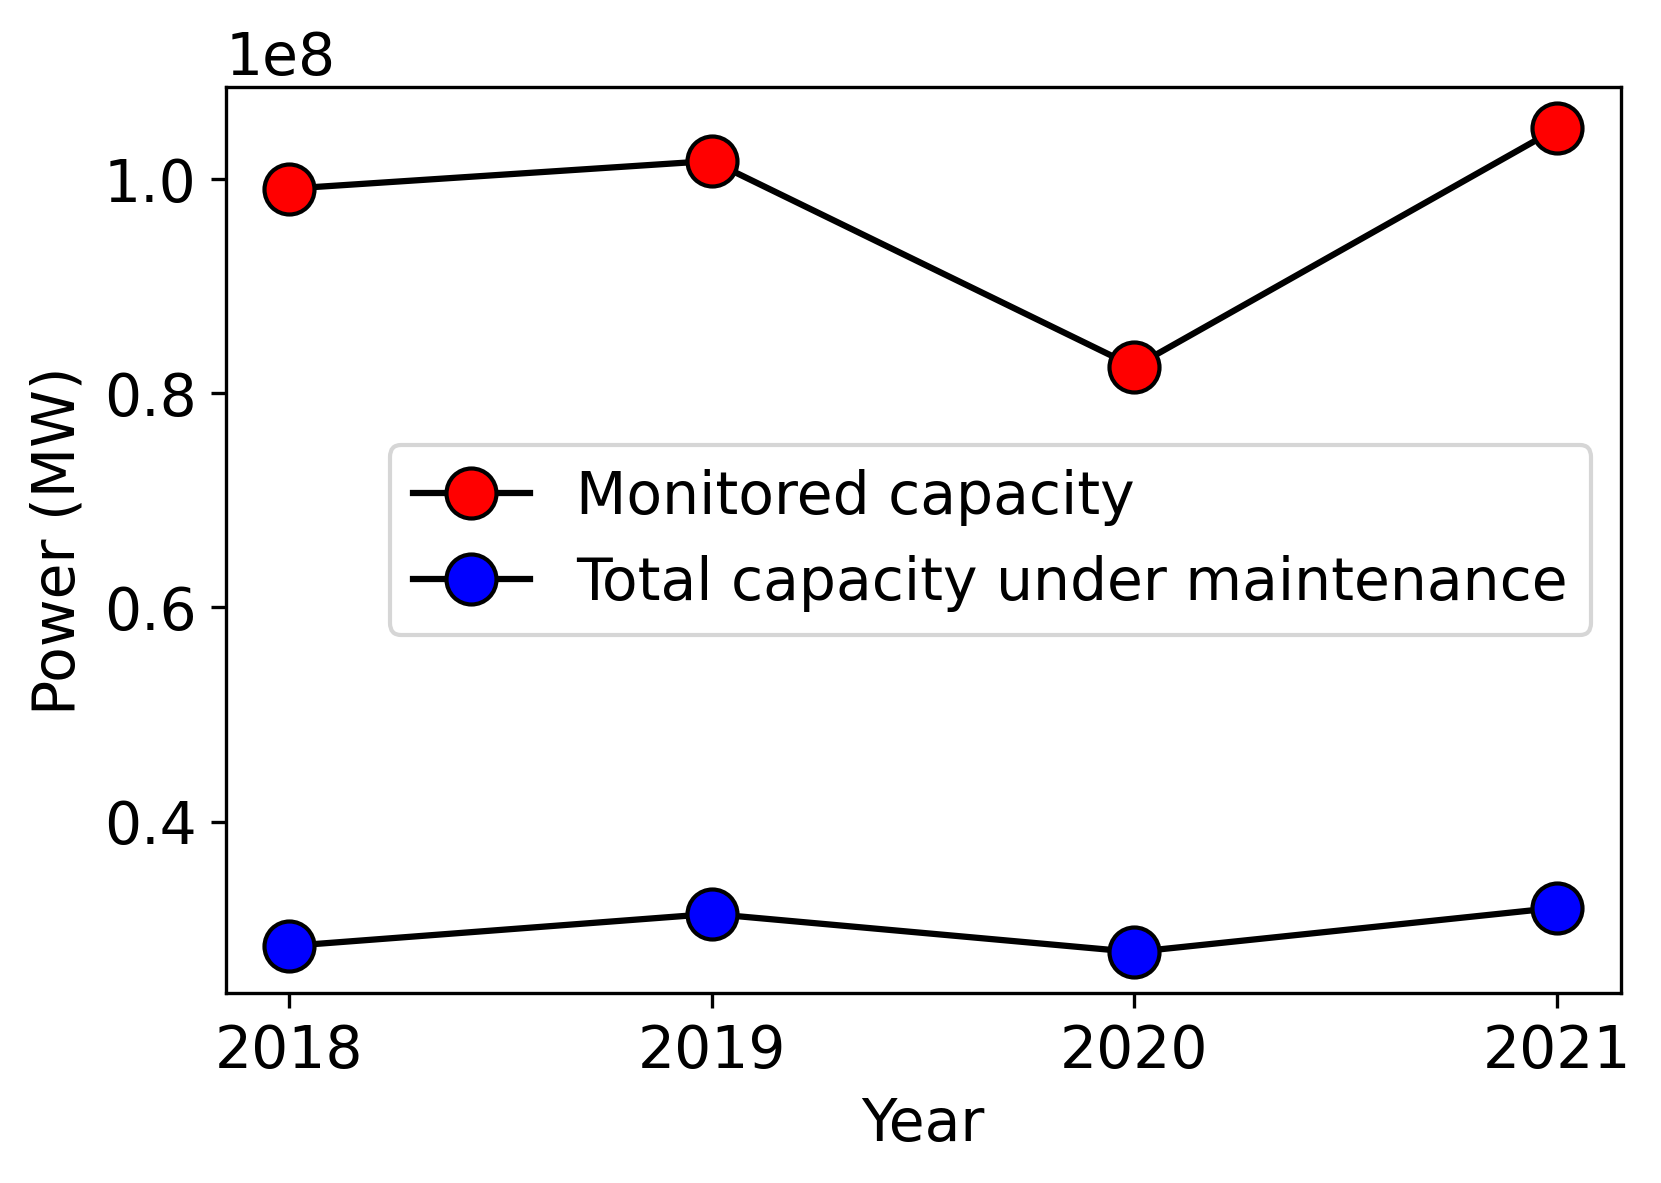

In [100]:
plt.plot(raw_df_yr['monitored_capacity_mw'],'-ok', markersize=12,
         markerfacecolor='r', markeredgecolor='k', label='Monitored capacity')
plt.plot(raw_df_yr['total_capacity_under_maintenance_mw'], '-ok', markersize=12,
         markerfacecolor='b', markeredgecolor='k', label='Total capacity under maintenance')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Power (MW)', )
plt.xticks(np.arange(2018,2022,1));

Text(0, 0.5, 'Power (MW)')

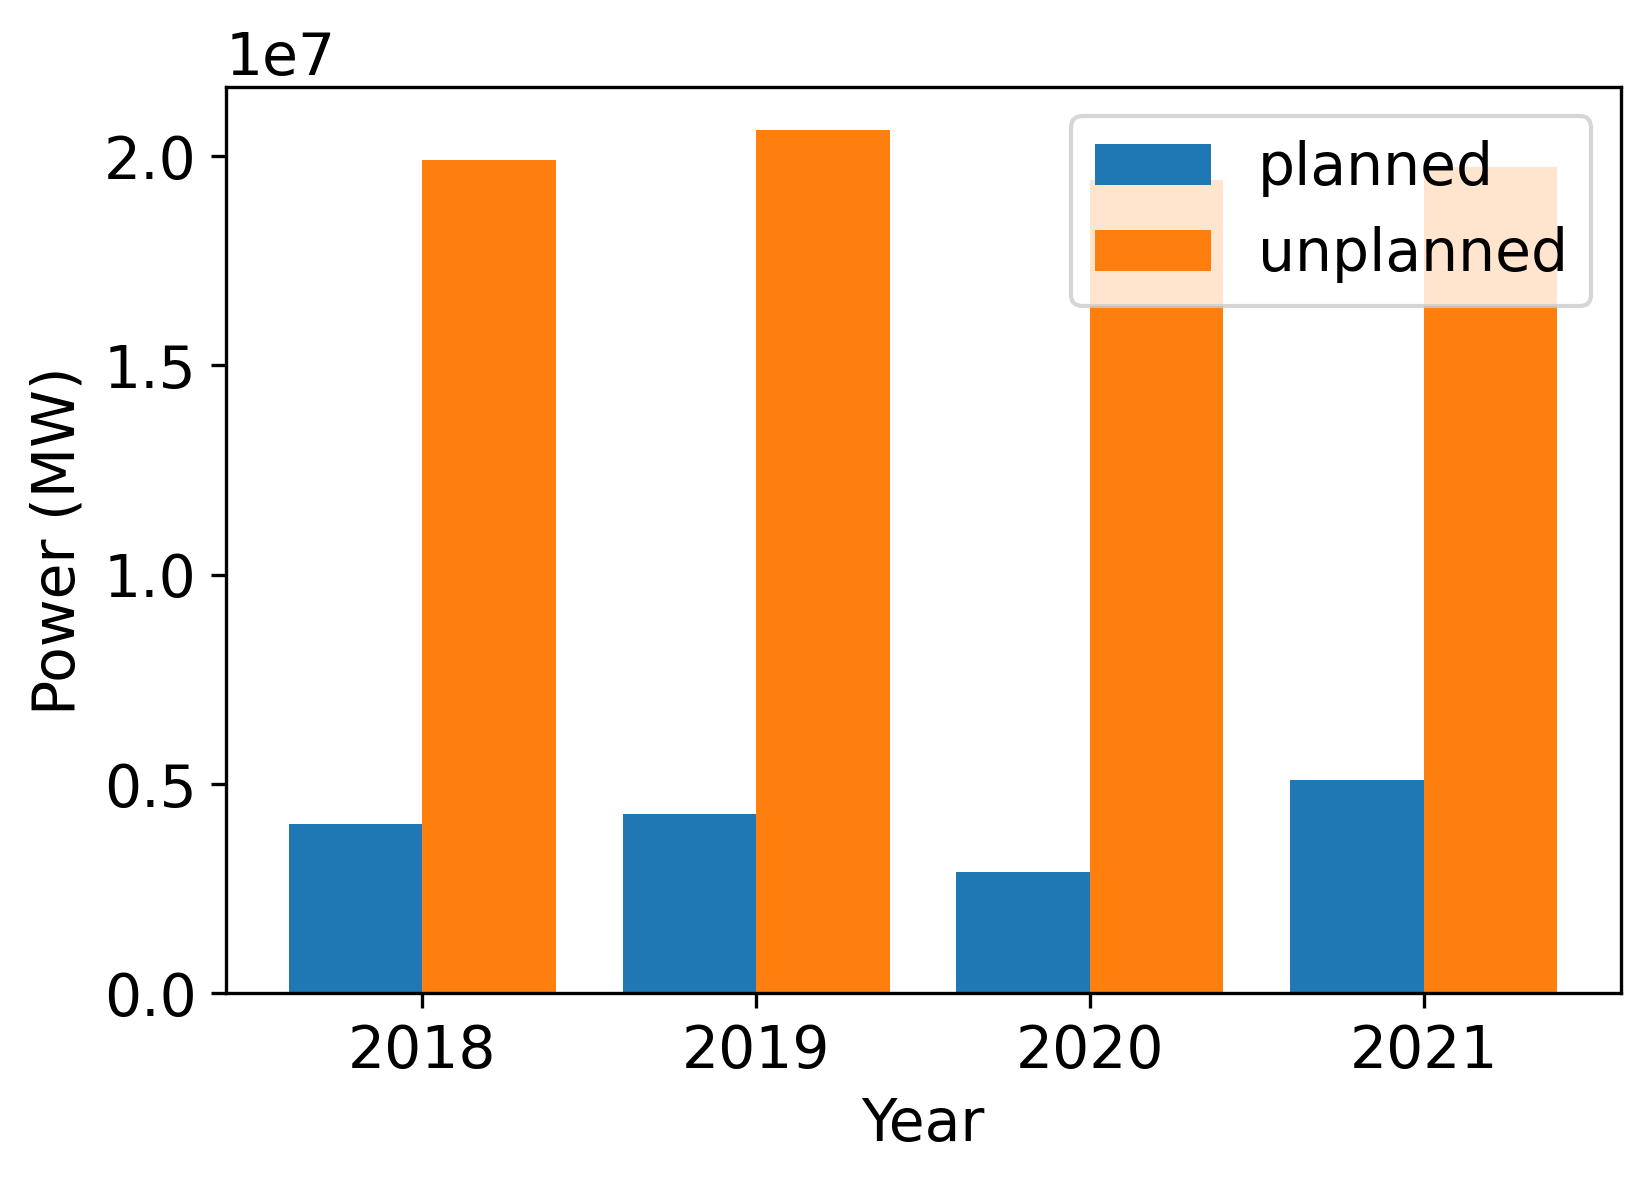

In [101]:
y1 = list(raw_df_yr['planned_maintenance_mw'])
y2 = list(raw_df_yr['unplanned_maintenance_mw'])
x=['2018', '2019', '2020', '2021']
plt.bar(x, y1,  align='edge', width=-0.4, label='planned')
plt.bar(x, y2,  align='edge', width=0.4, label='unplanned')
plt.legend()

plt.xlabel('Year')
plt.ylabel('Power (MW)')

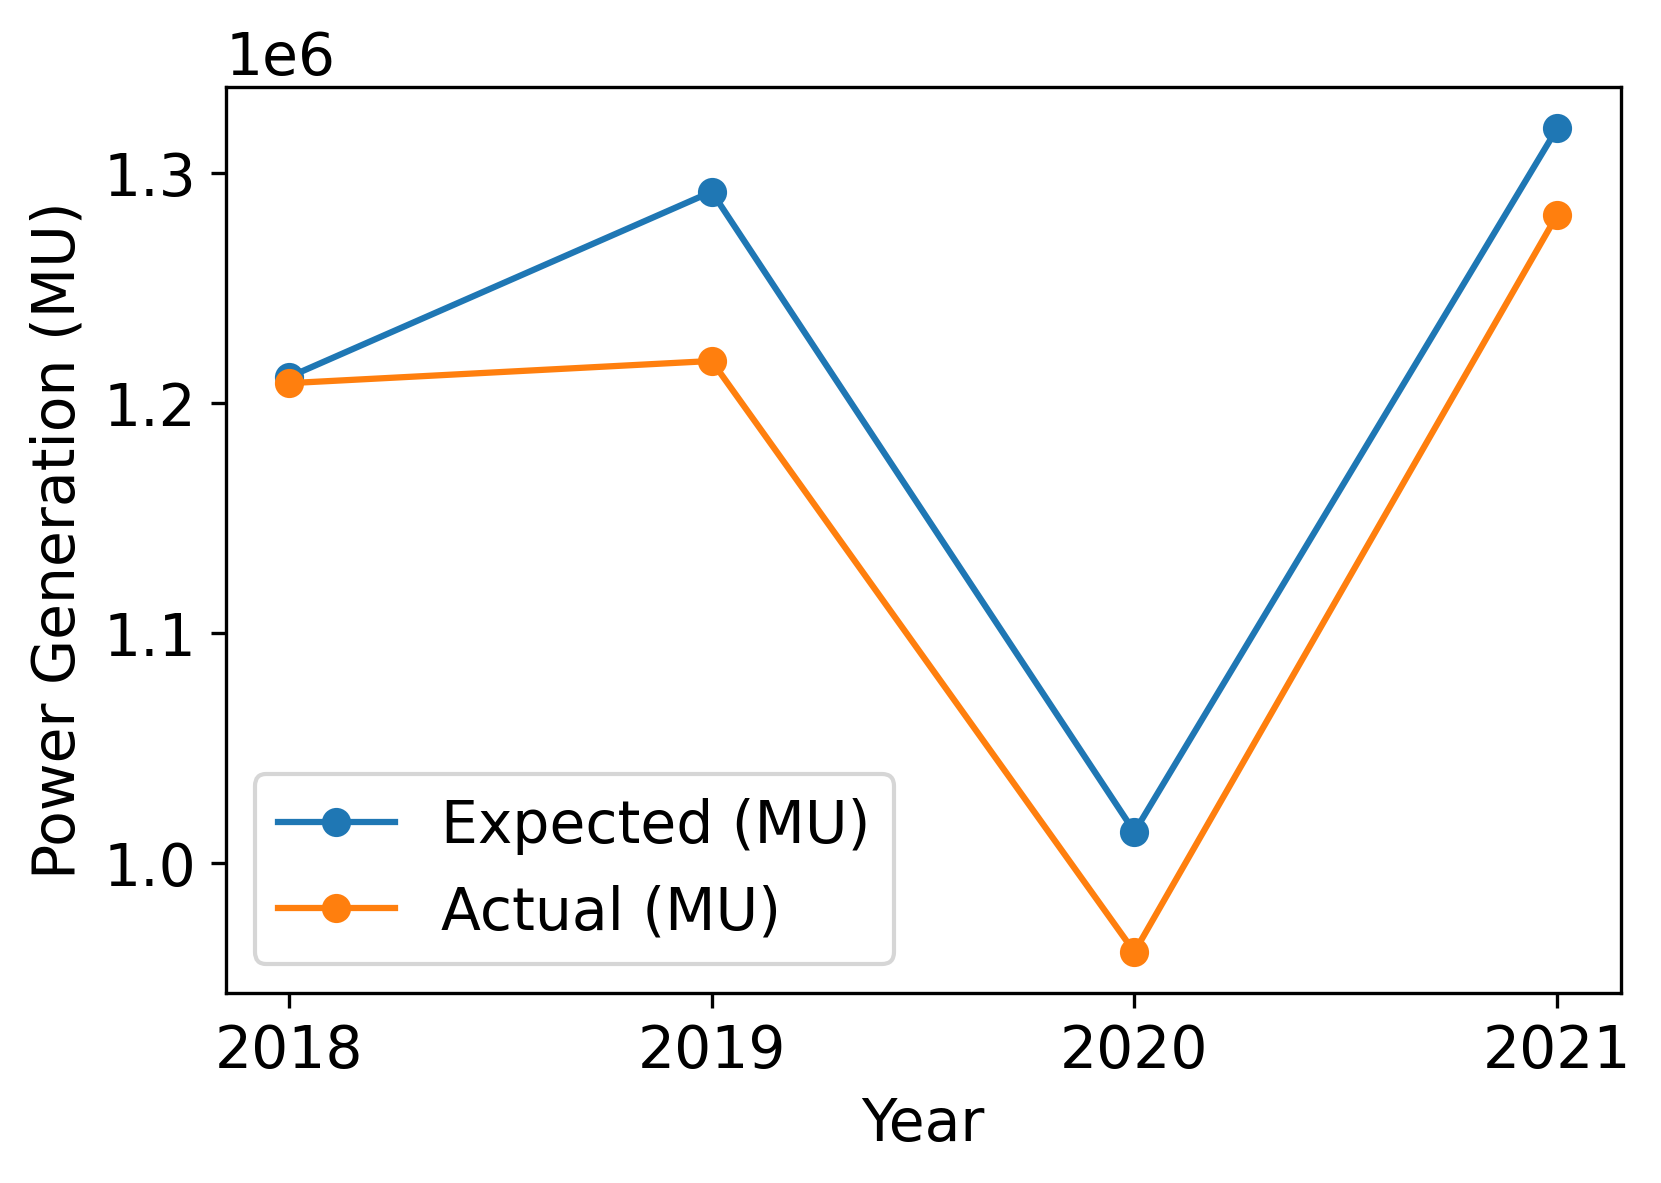

In [102]:
plt.plot(raw_df_yr['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(raw_df_yr['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Year'); plt.ylabel('Power Generation (MU)');
plt.xticks(np.arange(2018, 2022, 1)); # (start, stop, step)

Is there any trend month wise or day wise?

In [103]:
raw_df_month = raw_df.groupby(raw_df.date.dt.month)[list(raw_df.select_dtypes(include=[np.number]))].sum()
raw_df_day = raw_df.groupby(raw_df.date.dt.day)[list(raw_df.select_dtypes(include=[np.number]))].sum()

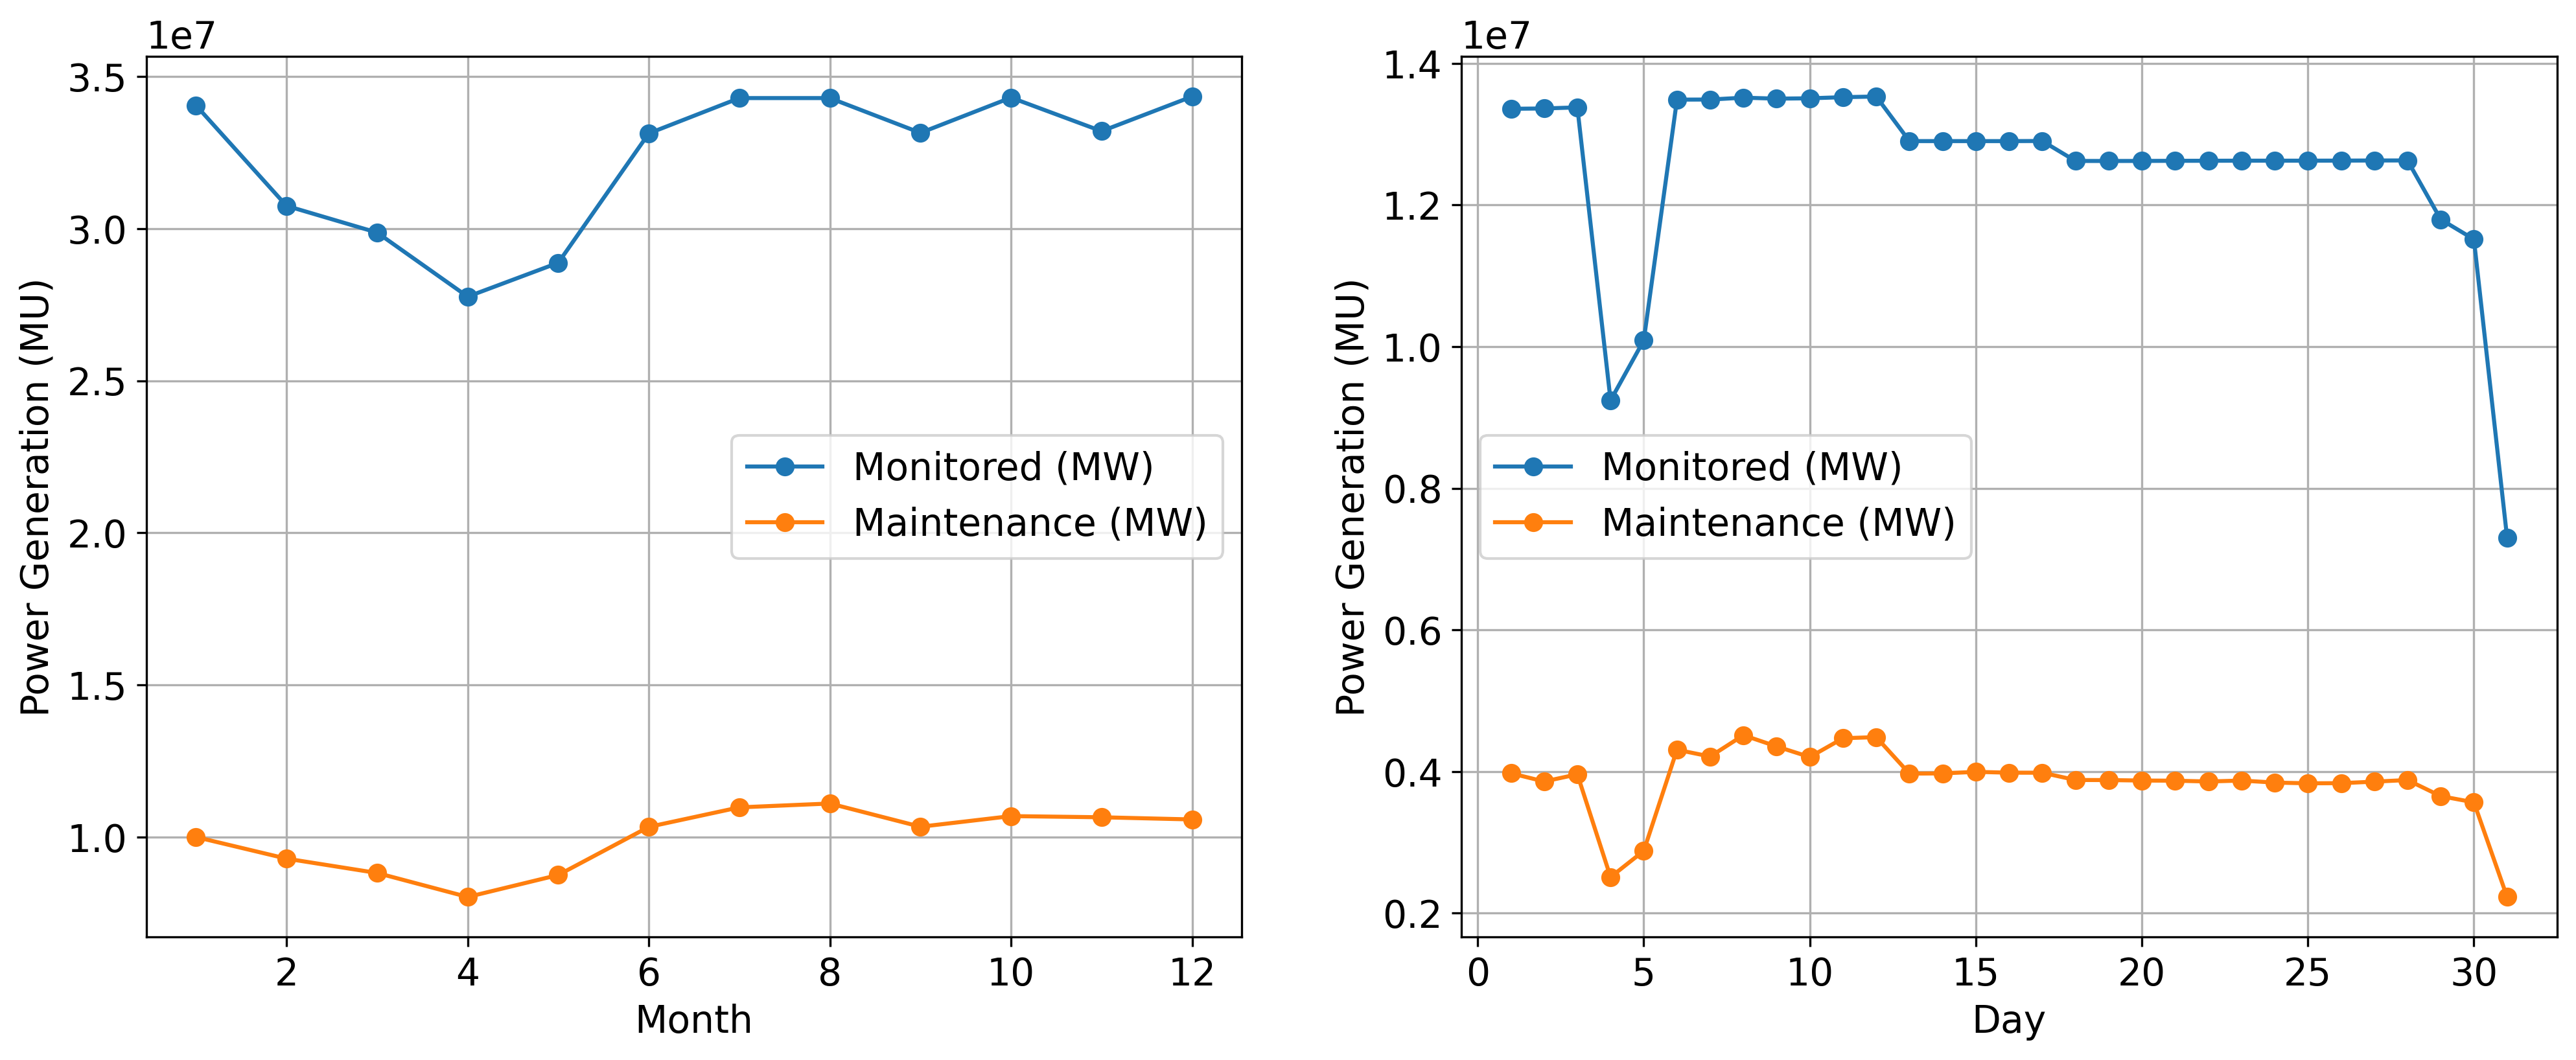

In [104]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) # 1 row and 2 columns, filling the 1st one

plt.plot(raw_df_month['monitored_capacity_mw'], '-o', label='Monitored (MW)')
plt.plot(raw_df_month['total_capacity_under_maintenance_mw'], '-o', label='Maintenance (MW)')
plt.legend()
plt.xlabel('Month'); plt.ylabel('Power Generation (MU)');
plt.grid()
# plt.xticks(np.arange(2018, 2022, 1)); # (start, stop, step)


plt.subplot(1,2,2) # 1 row and 2 columns, filling the 2nd one
plt.plot(raw_df_day['monitored_capacity_mw'], '-o', label='Monitored (MW)')
plt.plot(raw_df_day['total_capacity_under_maintenance_mw'], '-o', label='Maintenance (MW)')
plt.legend()
plt.xlabel('Day'); plt.ylabel('Power Generation (MU)');
plt.grid()

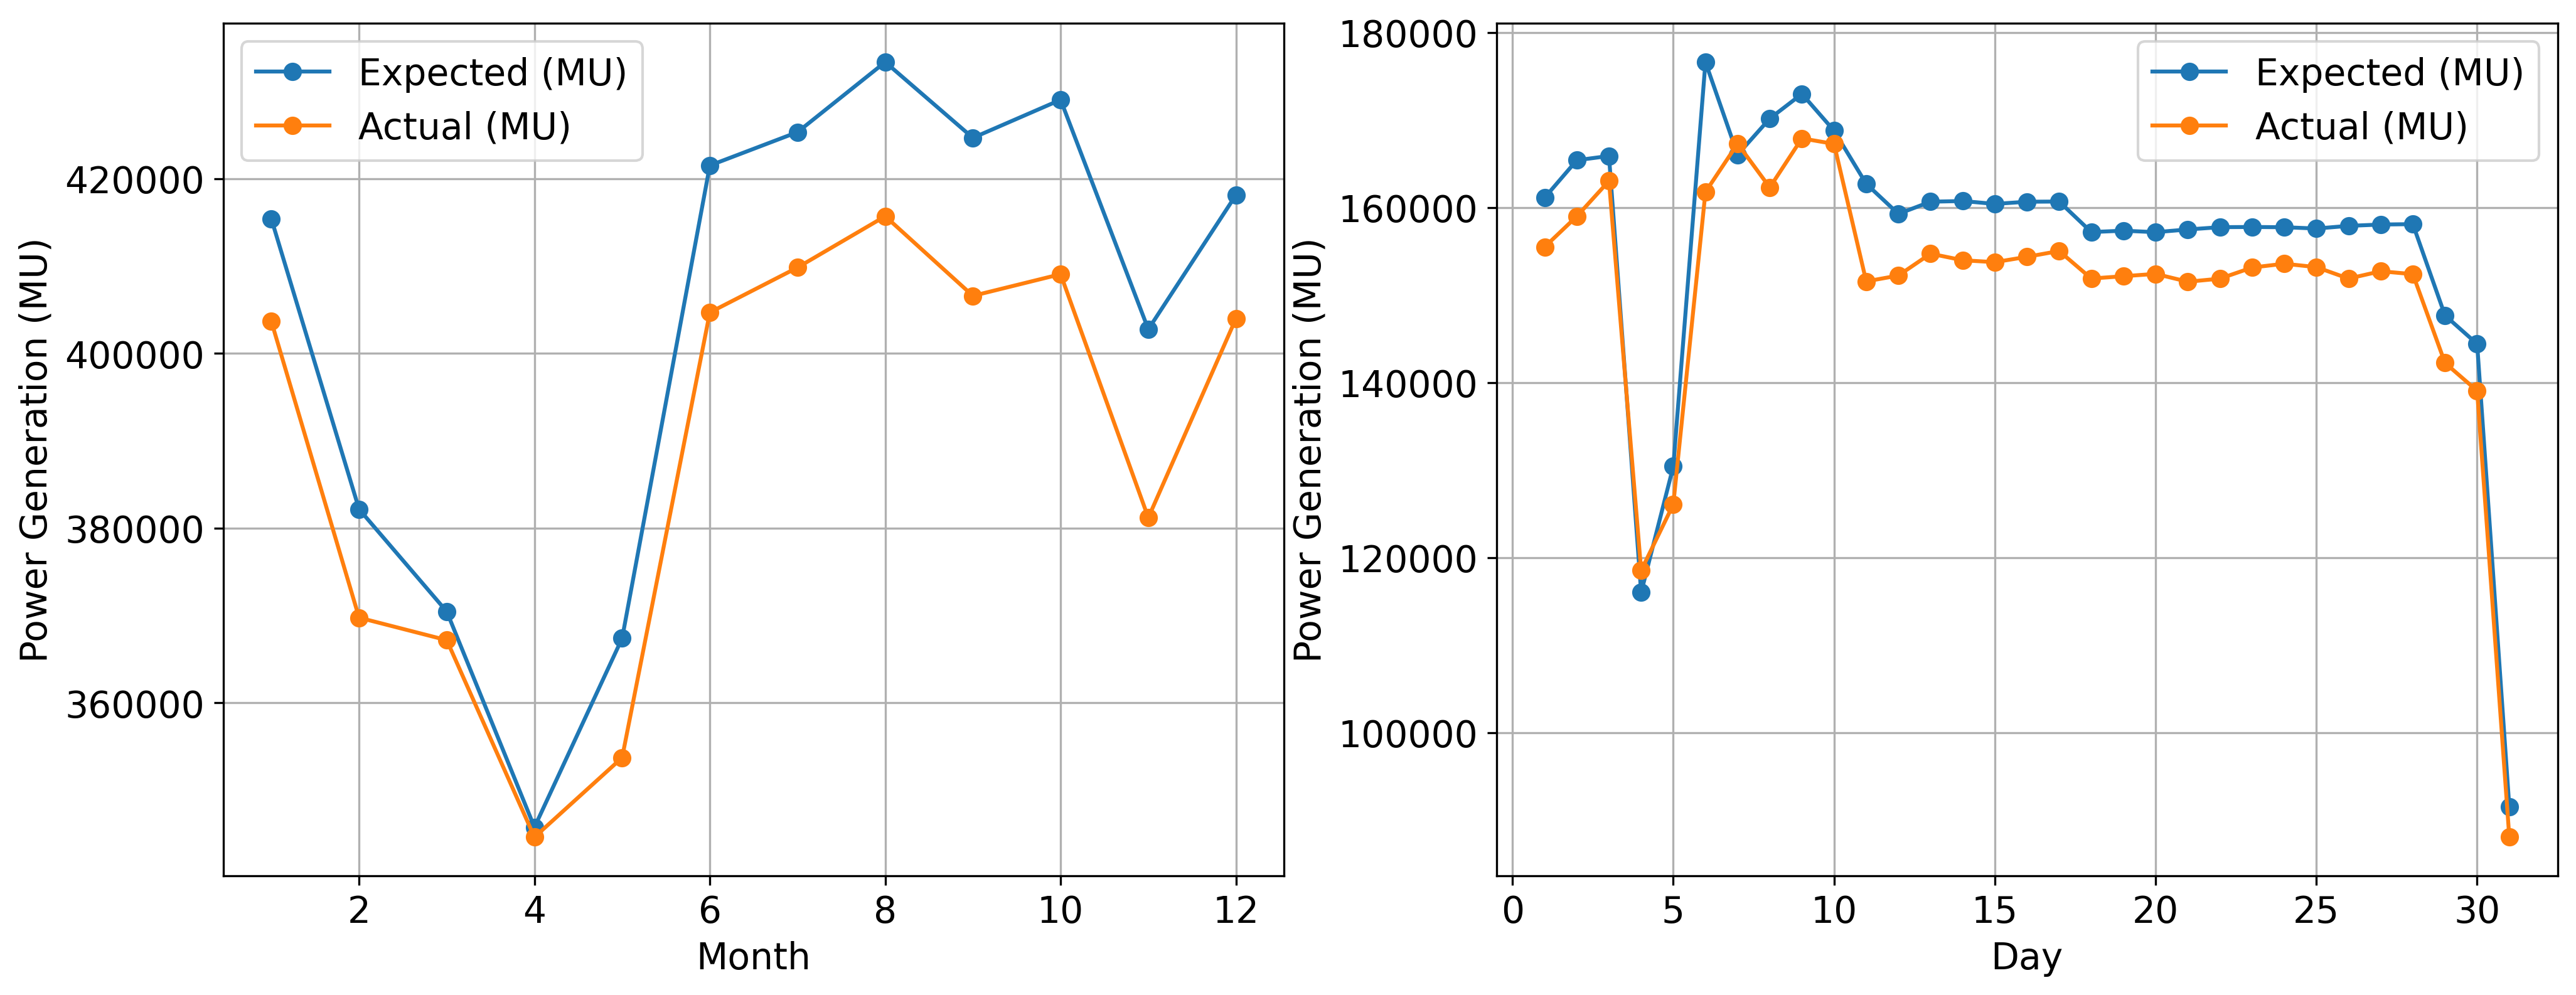

In [105]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) # 1 row and 2 columns, filling the 1st one

plt.plot(raw_df_month['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(raw_df_month['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Month'); plt.ylabel('Power Generation (MU)');
plt.grid()
# plt.xticks(np.arange(2018, 2022, 1)); # (start, stop, step)


plt.subplot(1,2,2) # 1 row and 2 columns, filling the 2nd one
plt.plot(raw_df_day['expected_generation_mu'], '-o', label='Expected (MU)')
plt.plot(raw_df_day['actual_generation_mu'], '-o', label='Actual (MU)')
plt.legend()
plt.xlabel('Day'); plt.ylabel('Power Generation (MU)');
plt.grid()

- April and May have the lowest production (power cuts!!). <br>

# 3. Data analysis

## 3.1 Data rearrangement

Let's understand the correlations in the data by considering the main columns<br>

In [106]:
df = raw_df.copy()
df

date  monitored_capacity_mw  total_capacity_under_maintenance_mw  \
0    2018-01-01              270648.43                             73883.61   
1    2018-01-02              271498.43                             73794.38   
2    2018-01-03              271245.51                             77858.33   
3    2018-01-04              274925.51                             69200.40   
4    2018-01-05              274711.51                             71556.05   
...         ...                    ...                                  ...   
1378 2021-12-27              288468.93                             75614.54   
1379 2021-12-28              288468.93                             77576.54   
1380 2021-12-29              288468.93                             81282.51   
1381 2021-12-30              288468.93                             83190.28   
1382 2021-12-31              288468.93                             80304.31   

      planned_maintenance_mw  expected_generation_mu  actual_generation_mu  \
0                    9594.65                    3180                  3088   
1                   10406.57                    3223                  3206   
2                    9552.87                    3353                  3353   
3                    8832.90                    3371                  3163   
4                    9514.40                    3388                  3191   
...                      ...                     ...                   ...   
1378                13943.55                    3502                  3522   
1379                14323.55                    3502                  3443   
1380                14258.51                    3502                  3352   
1381                14008.51                    3509                  3306   
1382                13581.05                    3541                  3418   

      unplanned_maintenance_mw  deviation_generation_mu  
0                     54042.50                      -92  
1                     53170.10                      -17  
2                     57569.60                        0  
3                     49143.10                     -208  
4                     49921.10                     -197  
...                        ...                      ...  
1378                  41297.79                       20  
1379                  42755.59                      -59  
1380                  45581.59                     -150  
1381                  46772.59                     -203  
1382                  43877.59                     -123  

[1383 rows x 8 columns]

In [107]:
df = df.drop(['planned_maintenance_mw','unplanned_maintenance_mw', 'deviation_generation_mu'], axis=1)
df

date  monitored_capacity_mw  total_capacity_under_maintenance_mw  \
0    2018-01-01              270648.43                             73883.61   
1    2018-01-02              271498.43                             73794.38   
2    2018-01-03              271245.51                             77858.33   
3    2018-01-04              274925.51                             69200.40   
4    2018-01-05              274711.51                             71556.05   
...         ...                    ...                                  ...   
1378 2021-12-27              288468.93                             75614.54   
1379 2021-12-28              288468.93                             77576.54   
1380 2021-12-29              288468.93                             81282.51   
1381 2021-12-30              288468.93                             83190.28   
1382 2021-12-31              288468.93                             80304.31   

      expected_generation_mu  actual_generation_mu  
0                       3180                  3088  
1                       3223                  3206  
2                       3353                  3353  
3                       3371                  3163  
4                       3388                  3191  
...                      ...                   ...  
1378                    3502                  3522  
1379                    3502                  3443  
1380                    3502                  3352  
1381                    3509                  3306  
1382                    3541                  3418  

[1383 rows x 5 columns]

Let's rename the column headers, they are too long. And move expected generation to the last.

In [108]:
df = df.rename(columns={'monitored_capacity_mw': 'capacity_mw', 
                        'total_capacity_under_maintenance_mw': 'maintenance_mw', 
                        'actual_generation_mu': 'generation_act_mu',
                        'expected_generation_mu':'generation_expc_mu'})
df

date  capacity_mw  maintenance_mw  generation_expc_mu  \
0    2018-01-01    270648.43        73883.61                3180   
1    2018-01-02    271498.43        73794.38                3223   
2    2018-01-03    271245.51        77858.33                3353   
3    2018-01-04    274925.51        69200.40                3371   
4    2018-01-05    274711.51        71556.05                3388   
...         ...          ...             ...                 ...   
1378 2021-12-27    288468.93        75614.54                3502   
1379 2021-12-28    288468.93        77576.54                3502   
1380 2021-12-29    288468.93        81282.51                3502   
1381 2021-12-30    288468.93        83190.28                3509   
1382 2021-12-31    288468.93        80304.31                3541   

      generation_act_mu  
0                  3088  
1                  3206  
2                  3353  
3                  3163  
4                  3191  
...                 ...  
1378               3522  
1379               3443  
1380               3352  
1381               3306  
1382               3418  

[1383 rows x 5 columns]

Rearrange the columns in the order we want.

In [109]:
df = df[['date', 'capacity_mw', 'maintenance_mw', 'generation_act_mu' ,'generation_expc_mu']]
df

date  capacity_mw  maintenance_mw  generation_act_mu  \
0    2018-01-01    270648.43        73883.61               3088   
1    2018-01-02    271498.43        73794.38               3206   
2    2018-01-03    271245.51        77858.33               3353   
3    2018-01-04    274925.51        69200.40               3163   
4    2018-01-05    274711.51        71556.05               3191   
...         ...          ...             ...                ...   
1378 2021-12-27    288468.93        75614.54               3522   
1379 2021-12-28    288468.93        77576.54               3443   
1380 2021-12-29    288468.93        81282.51               3352   
1381 2021-12-30    288468.93        83190.28               3306   
1382 2021-12-31    288468.93        80304.31               3418   

      generation_expc_mu  
0                   3180  
1                   3223  
2                   3353  
3                   3371  
4                   3388  
...                  ...  
1378                3502  
1379                3502  
1380                3502  
1381                3509  
1382                3541  

[1383 rows x 5 columns]

Let's make parity plot between the actual and expected power generation.

(2500.0, 4500.0)

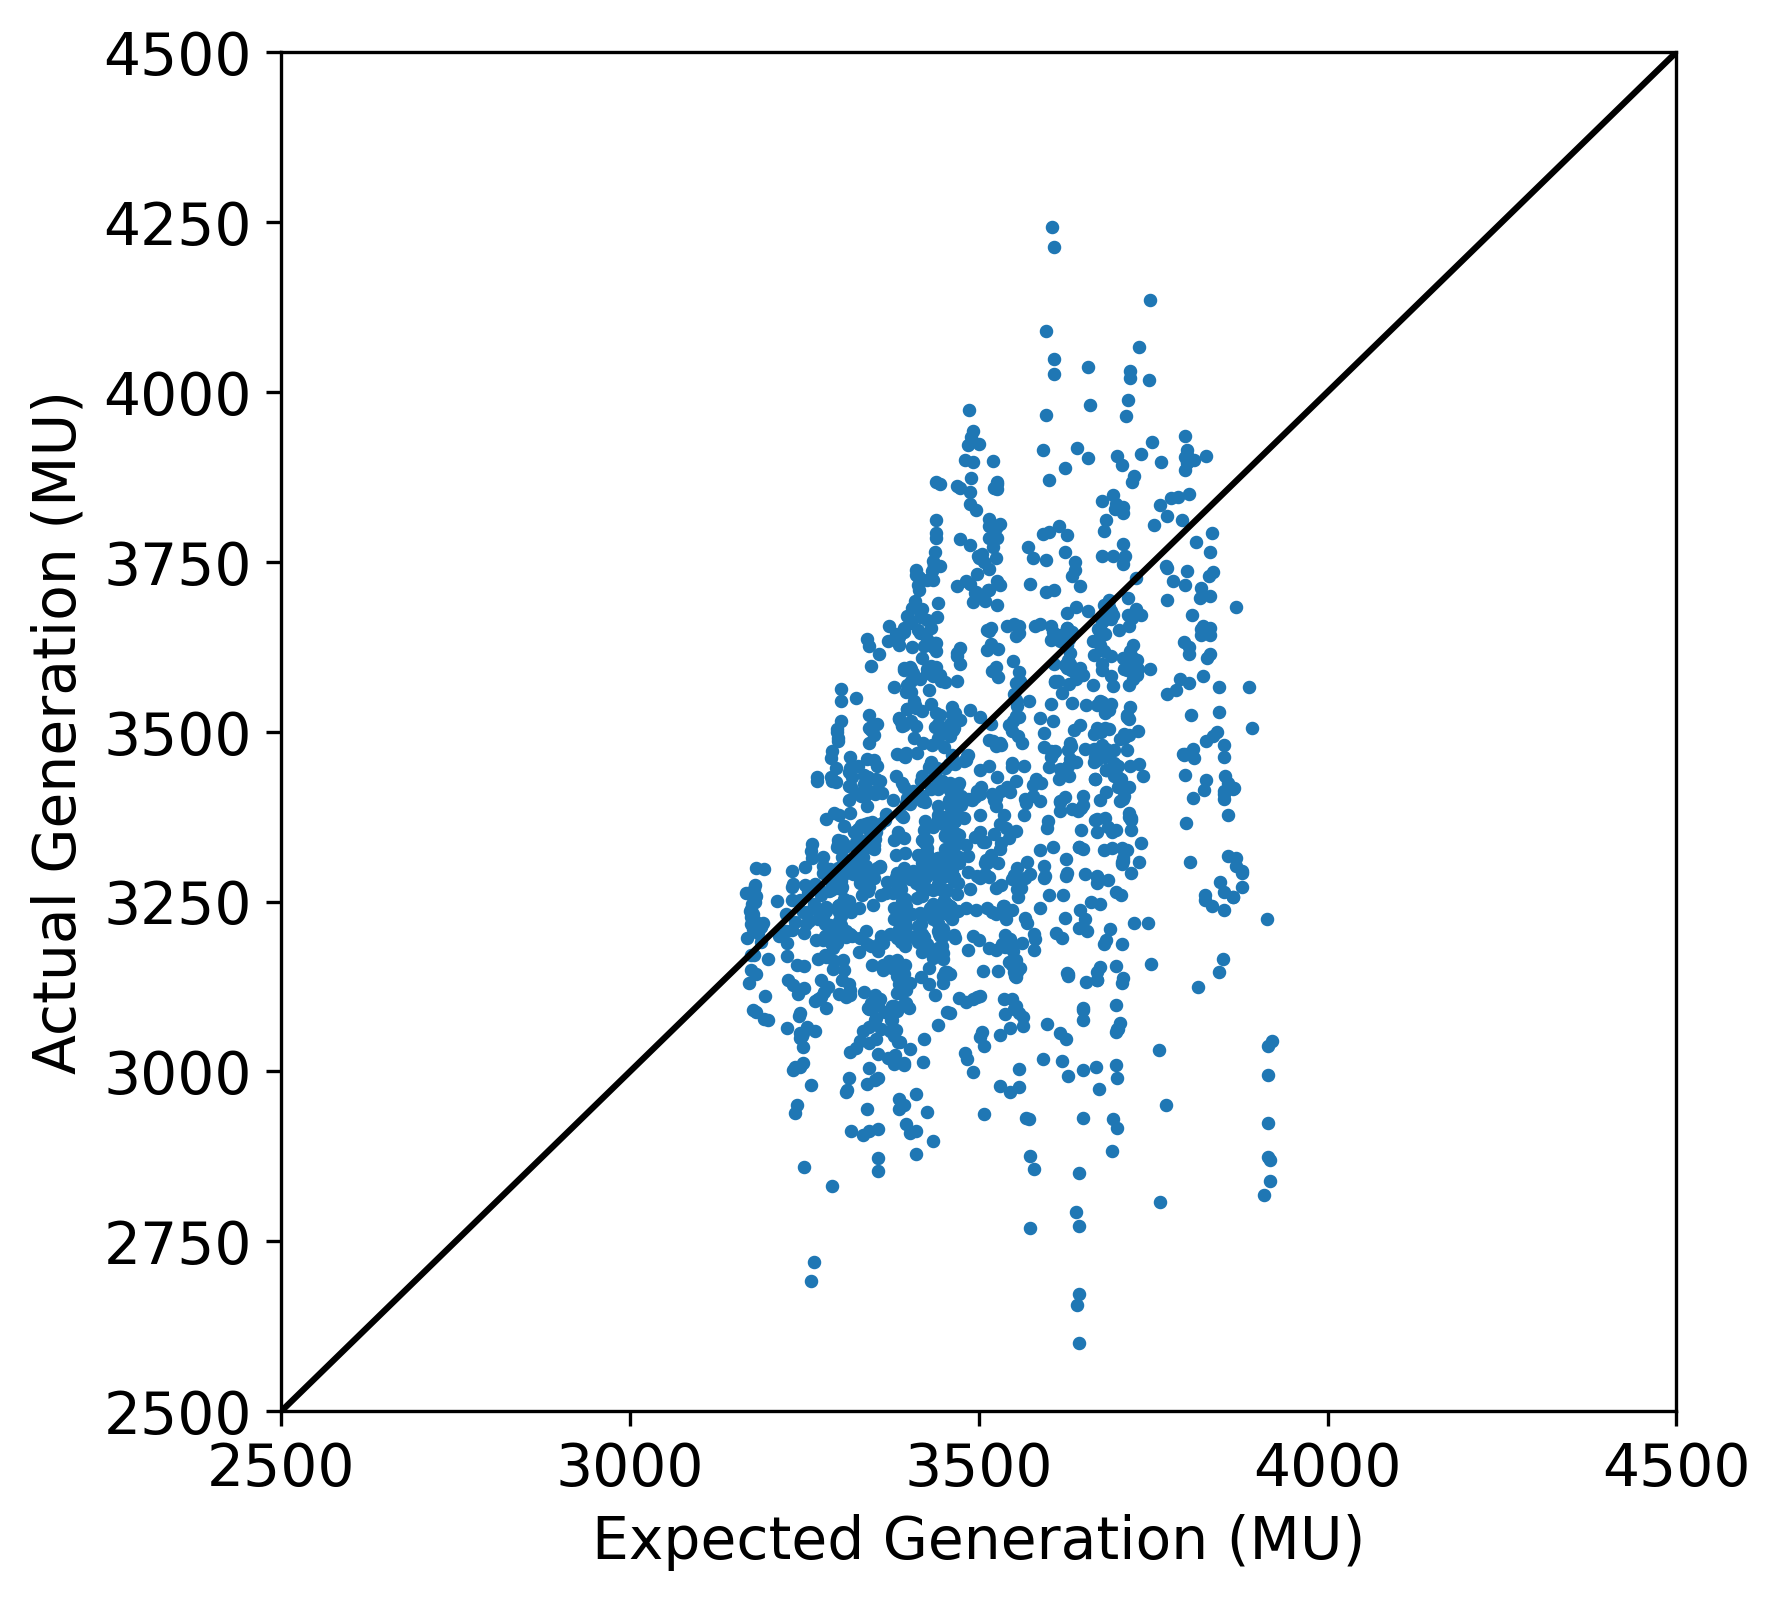

In [110]:
plt.figure(figsize=(6,6))
start=2500; end=4500;
line = np.linspace(start,end,100)

plt.scatter(df['generation_expc_mu'], df['generation_act_mu'], s=5)

plt.plot(line, line, 'k')
plt.xlabel('Expected Generation (MU)')
plt.ylabel('Actual Generation (MU)')

plt.xlim(start,end)
plt.ylim(start,end)

Let's study yearwise.

In [111]:
df_2018 = df[pd.DatetimeIndex(df['date']).year ==2018]
df_2018

date  capacity_mw  maintenance_mw  generation_act_mu  \
0   2018-01-01    270648.43        73883.61               3088   
1   2018-01-02    271498.43        73794.38               3206   
2   2018-01-03    271245.51        77858.33               3353   
3   2018-01-04    274925.51        69200.40               3163   
4   2018-01-05    274711.51        71556.05               3191   
..         ...          ...             ...                ...   
357 2018-12-27    274552.06        80894.85               3302   
358 2018-12-28    274552.06        80661.46               3281   
359 2018-12-29    274552.06        84264.89               3206   
360 2018-12-30    274352.06        84685.85               3092   
361 2018-12-31    274352.06        85883.22               3177   

     generation_expc_mu  
0                  3180  
1                  3223  
2                  3353  
3                  3371  
4                  3388  
..                  ...  
357                3338  
358                3338  
359                3338  
360                3343  
361                3355  

[362 rows x 5 columns]

In [112]:
df_2019 = df[pd.DatetimeIndex(df['date']).year ==2019]
df_2020 = df[pd.DatetimeIndex(df['date']).year ==2020]
df_2021 = df[pd.DatetimeIndex(df['date']).year ==2021]

In [113]:
df_2019

date  capacity_mw  maintenance_mw  generation_act_mu  \
362 2019-01-01    276012.06        80368.86               3162   
363 2019-01-02    275152.06        82507.43               3140   
364 2019-01-03    275052.06        82640.82               3327   
365 2019-01-04    275612.06        74684.13               3473   
366 2019-01-05    278392.06        76629.29               3436   
..         ...          ...             ...                ...   
722 2019-12-27    282014.15        86214.30               3293   
723 2019-12-28    282014.15        87023.40               3233   
724 2019-12-29    282014.15        88237.18               3147   
725 2019-12-30    282014.15        91606.10               3264   
726 2019-12-31    282814.15        87508.17               3333   

     generation_expc_mu  
362                3383  
363                3387  
364                3459  
365                3694  
366                3795  
..                  ...  
722                3451  
723                3452  
724                3452  
725                3452  
726                3481  

[365 rows x 5 columns]

In [114]:
df_2020

date  capacity_mw  maintenance_mw  generation_act_mu  \
727  2020-01-01    282814.15        87173.94               3202   
728  2020-01-02    282302.28        83957.66               3314   
729  2020-01-03    282602.28        85735.43               3189   
730  2020-01-06    283048.43       106737.20               3038   
731  2020-01-07    283318.43        98173.25               3538   
...         ...          ...             ...                ...   
1013 2020-12-27    284003.43        78859.71               3300   
1014 2020-12-28    284003.43        79175.71               3408   
1015 2020-12-29    284003.43        82900.41               3413   
1016 2020-12-30    284003.43        85086.68               3379   
1017 2020-12-31    284003.43        86567.61               3395   

      generation_expc_mu  
727                 3419  
728                 3441  
729                 3562  
730                 3914  
731                 3555  
...                  ...  
1013                3354  
1014                3351  
1015                3354  
1016                3367  
1017                3395  

[291 rows x 5 columns]

In [115]:
df_2021

date  capacity_mw  maintenance_mw  generation_act_mu  \
1018 2021-01-01    284003.43        86147.51               3329   
1019 2021-01-02    284643.44        75801.99               3578   
1020 2021-01-03    286093.44        80470.58               3723   
1021 2021-01-04    287650.93        77796.01               3716   
1022 2021-01-05    287650.93        81520.81               3634   
...         ...          ...             ...                ...   
1378 2021-12-27    288468.93        75614.54               3522   
1379 2021-12-28    288468.93        77576.54               3443   
1380 2021-12-29    288468.93        81282.51               3352   
1381 2021-12-30    288468.93        83190.28               3306   
1382 2021-12-31    288468.93        80304.31               3418   

      generation_expc_mu  
1018                3426  
1019                3721  
1020                3425  
1021                3530  
1022                3616  
...                  ...  
1378                3502  
1379                3502  
1380                3502  
1381                3509  
1382                3541  

[365 rows x 5 columns]

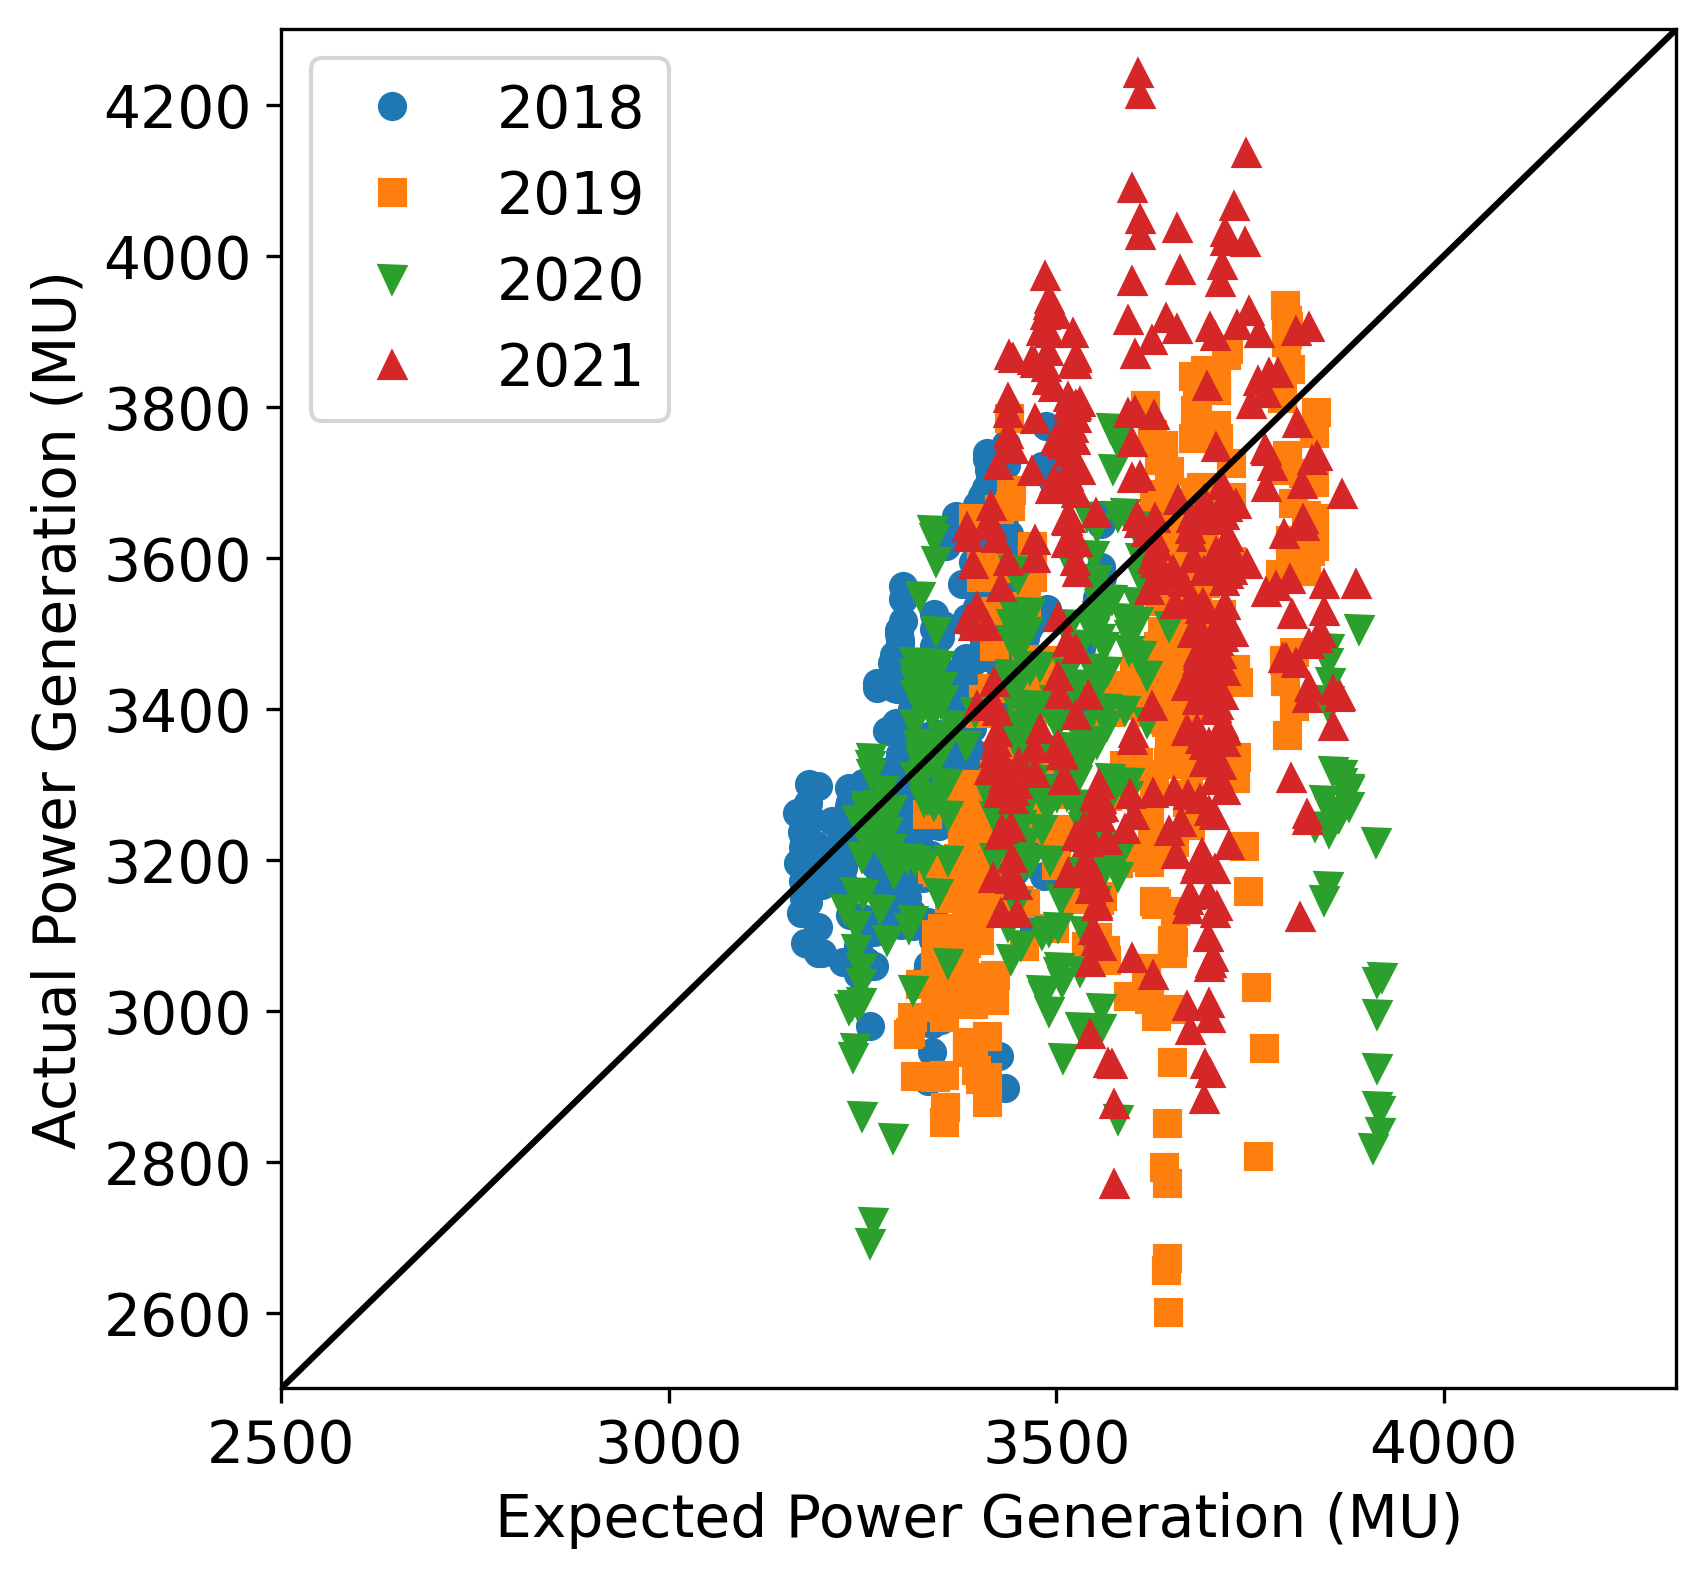

In [116]:
plt.figure(figsize=(6,6))
begin=2500; end=4300
line=np.linspace(begin,end,100)

plt.plot(df_2018['generation_expc_mu'].to_numpy(), df_2018['generation_act_mu'].to_numpy(),'o', label='2018')
plt.plot(df_2019['generation_expc_mu'].to_numpy(), df_2019['generation_act_mu'].to_numpy(),'s', label='2019')
plt.plot(df_2020['generation_expc_mu'].to_numpy(), df_2020['generation_act_mu'].to_numpy(),'v', label='2020')
plt.plot(df_2021['generation_expc_mu'].to_numpy(), df_2021['generation_act_mu'].to_numpy(),'^', label='2021')

plt.plot(line,line,'k')

plt.xlim(begin,end)
plt.ylim(begin,end)
plt.legend()

plt.xlabel('Expected Power Generation (MU)')
plt.ylabel('Actual Power Generation (MU)')
plt.savefig('year_actual_expected.jpg', dpi=300, bbox_inches='tight')

How does maintenance affect the amount of power generation?

/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='generation_act_mu', ylabel='Count'>

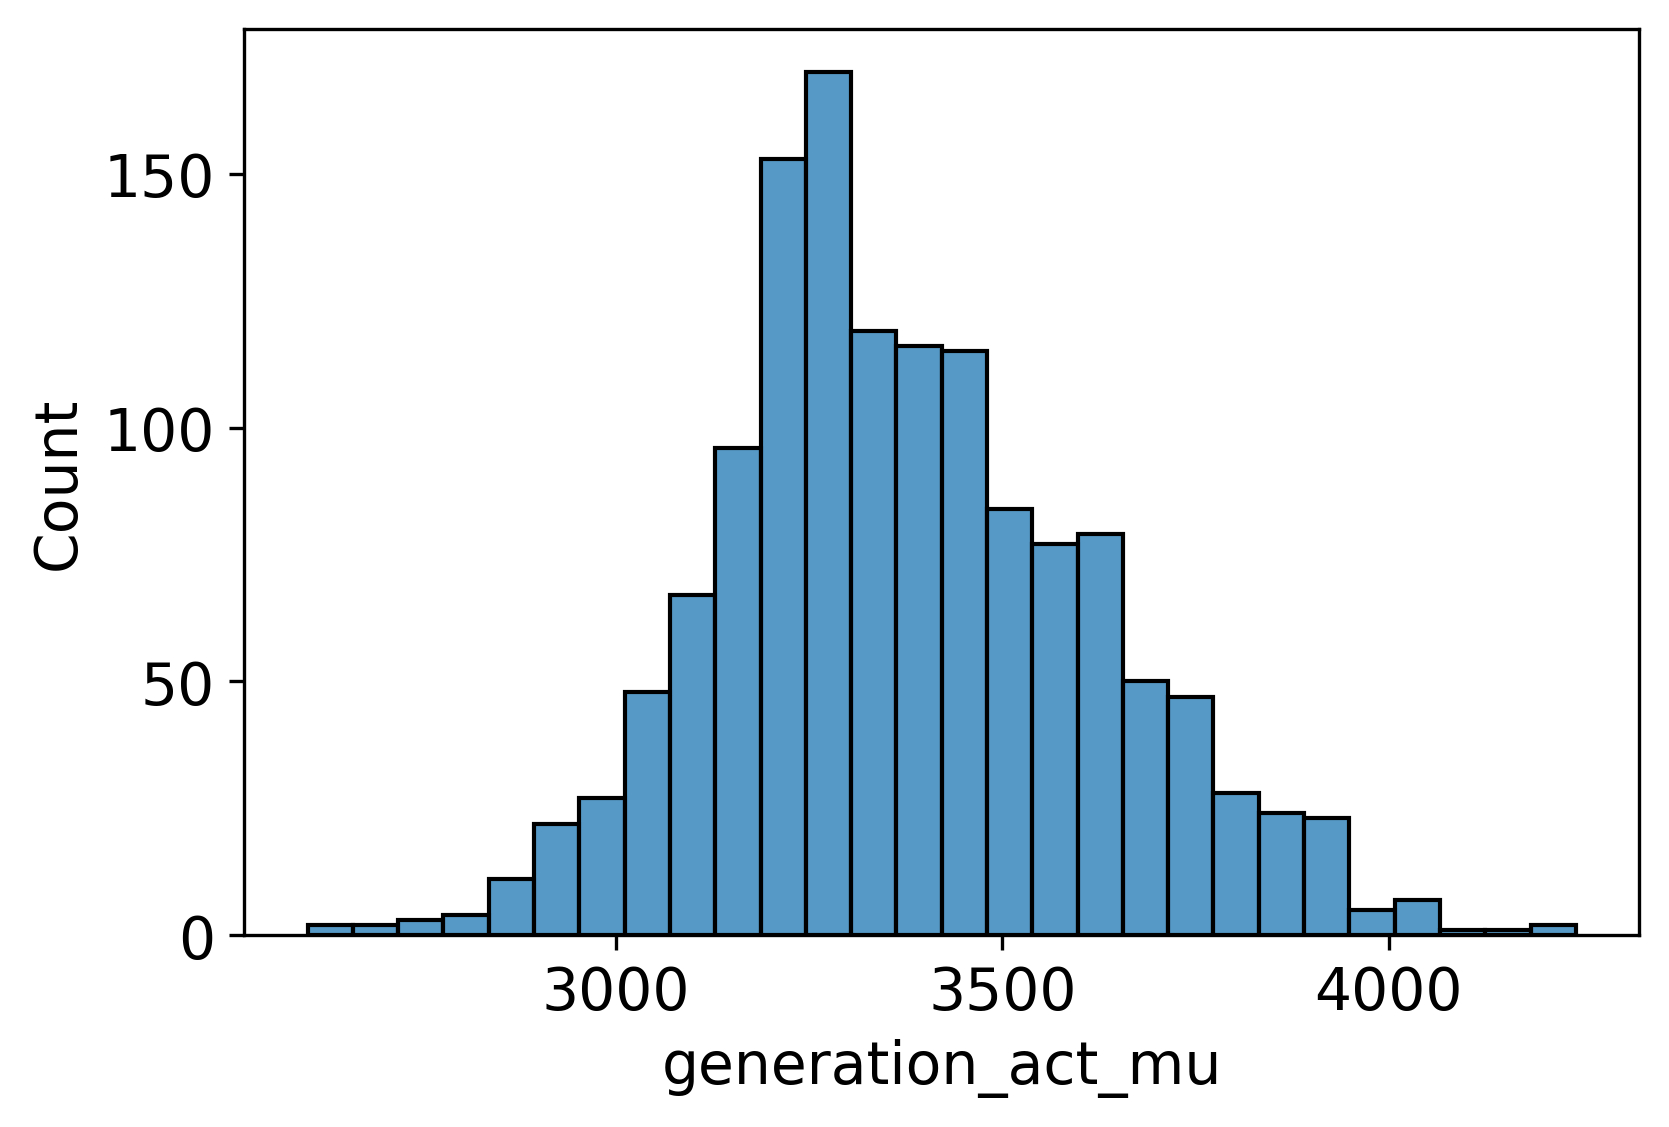

In [117]:
sns.histplot(df['generation_act_mu'])

Text(0, 0.5, 'Maintenance (MW)')

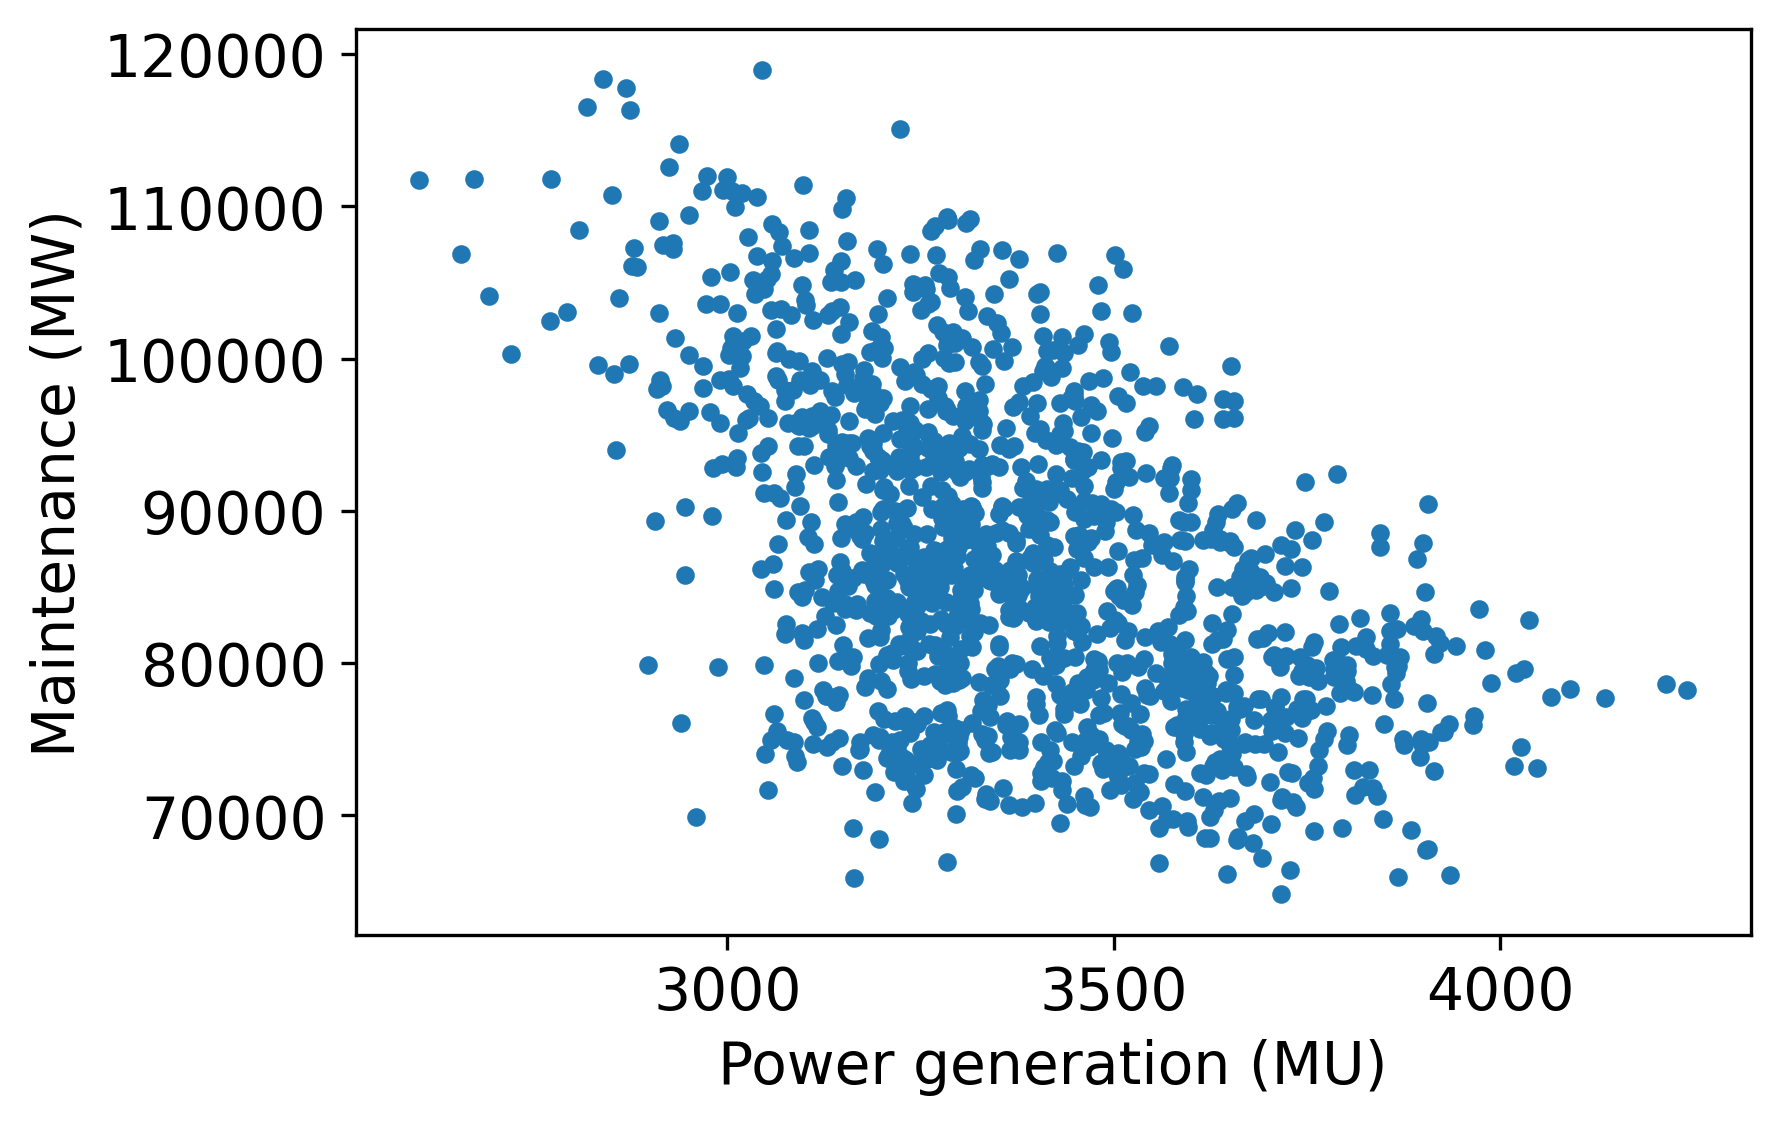

In [118]:
plt.scatter(df['generation_act_mu'], df['maintenance_mw'], s=12)
plt.xlabel('Power generation (MU)')
plt.ylabel('Maintenance (MW)')

When the maintenance is low, higher amount of power is generated. <br>

Pair plot gives the correlations between different features. <br>
Let's the correlations of various features.

/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

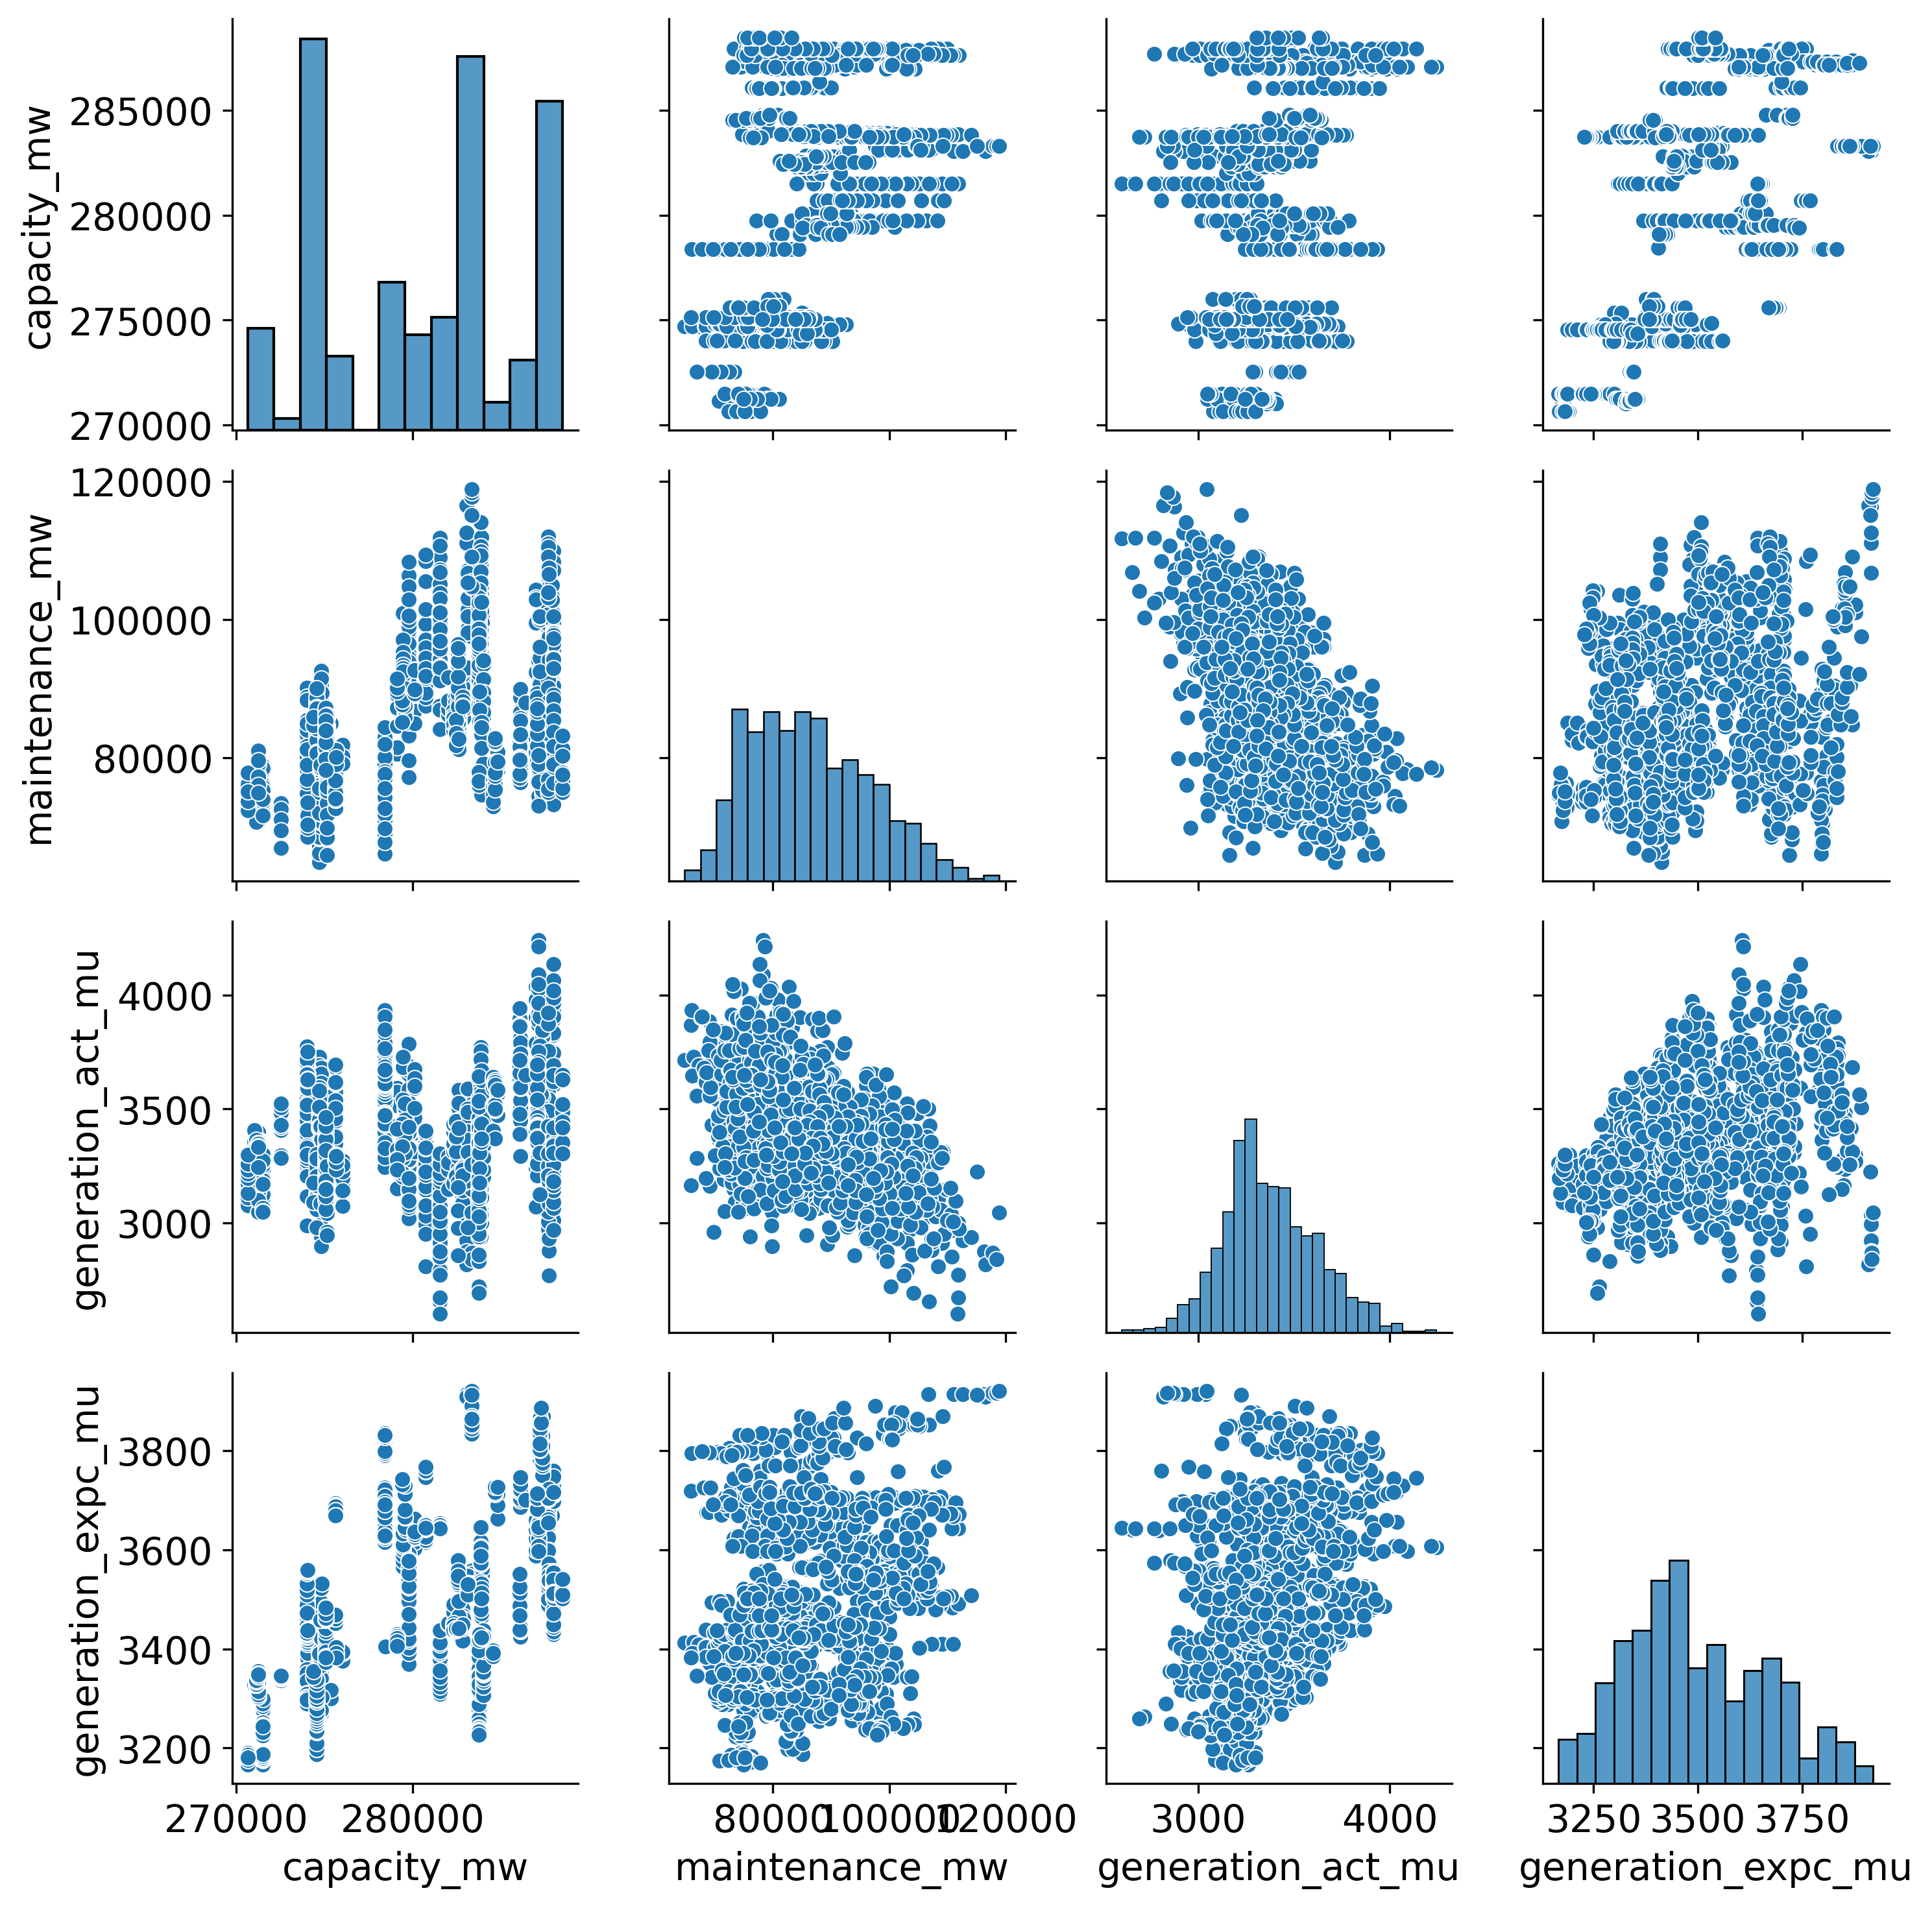

In [119]:
sns.pairplot(df)
plt.savefig('pairplot1.jpg', dpi=600, bbox_inches='tight')

/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/sachin/.sage/local/lib/python3.10/site-packages/seaborn/_oldcore.py:1

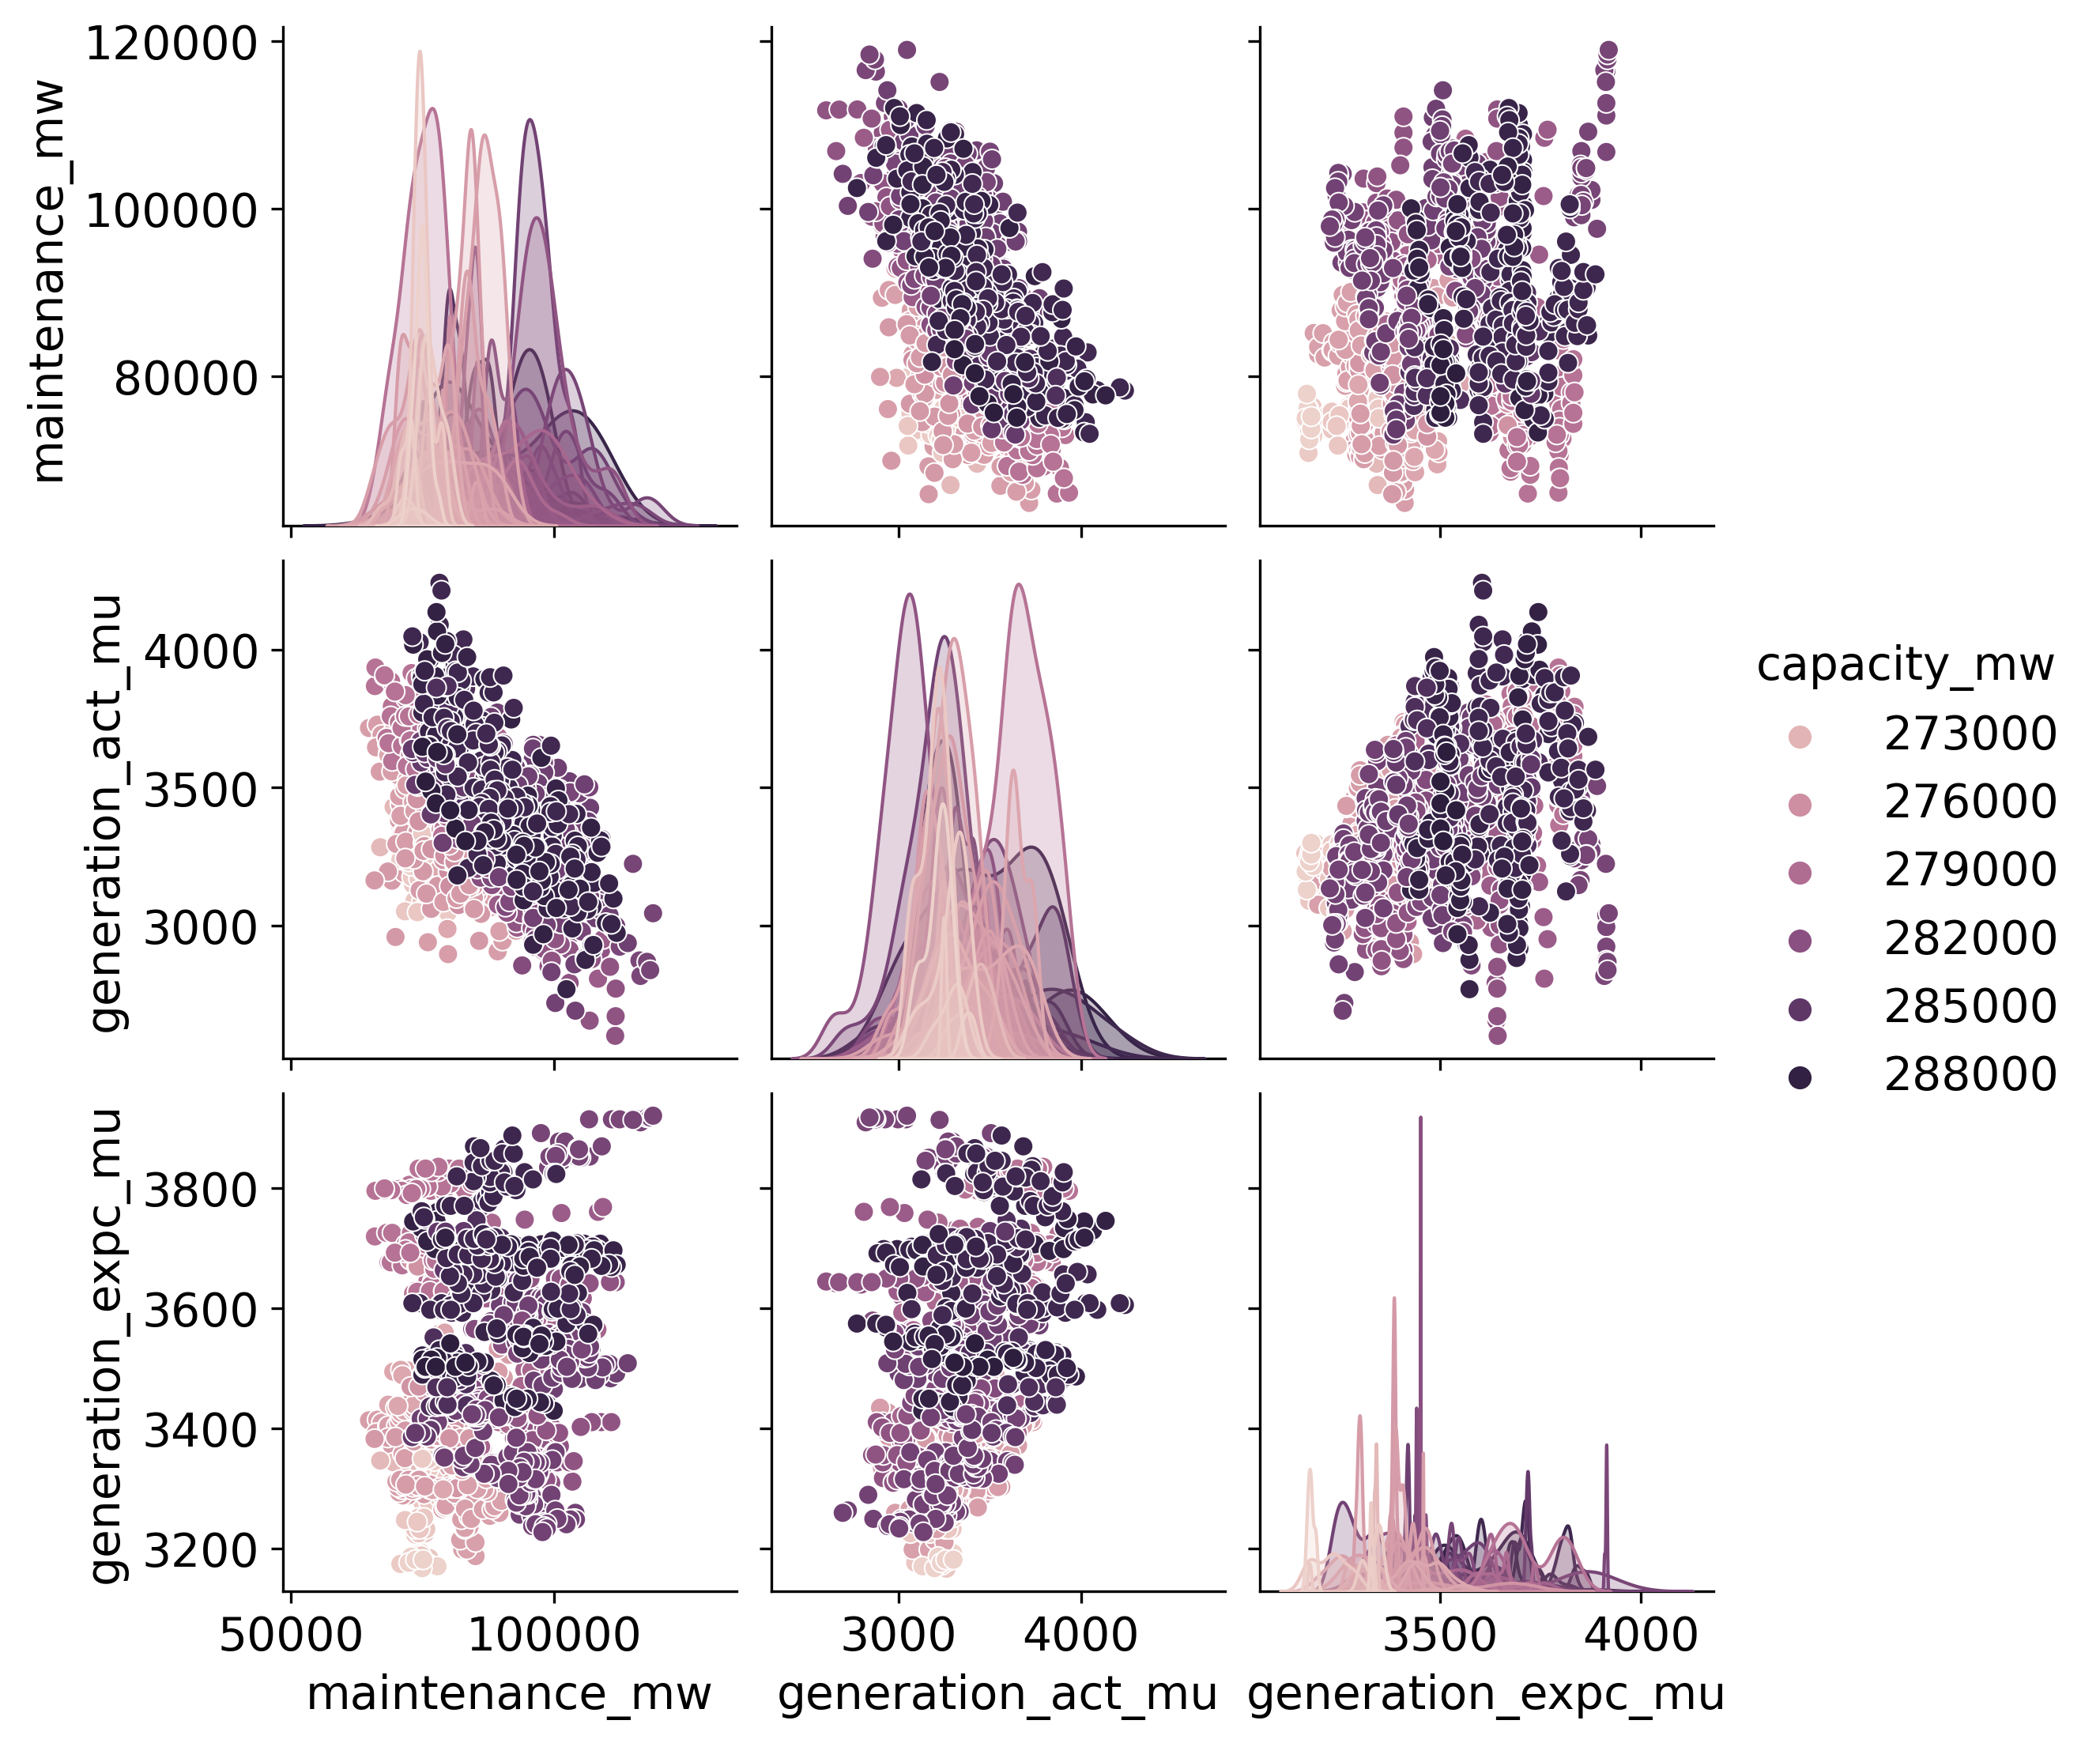

In [120]:
sns.pairplot(df, hue='capacity_mw')
plt.savefig('pairplot2.png', dpi=300, bbox_inches='tight')
plt.savefig('pairplot2.pdf', bbox_inches='tight')

# Important commands

## Data cleaning
- Dropping a column <br>
`df = df.drop(['forced_maintenance_mw','other_reasons_mw'], axis=1)`

- Dropping a row <br>
`df_date_clean = df_date_clean.drop(df_date_clean.index[[34,799]], axis=0)`

- Excluding some rows <br>
`df_clean = df[(df['date'] != '2020-03-18') & (df['date'] != '2018-02-04')]`

- Excluding a range of dates <br>
`df = df[(df['date'] > '2017-12-31') & (df['date'] < '2022-01-01')]`

## Exporting graphs

```
plt.figure(figsize=(8,6))
font = {'family':'Arial', 'size':14}
plt.rc('font', **font)

<plotting code>
<plotting code>
.
.
.

plt.savefig('path/to/file/fig.jpg', dpi=600, bbox_inches = 'tight')
plt.savefig('path/to/file/fig.pdf', bbox_inches = 'tight')

```

---